# Исследование по продажам игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования:

  1) Изучить стабильность выпуска игры, платформы выхода.\
  2) Изучить влияние оценок пользователей и критиков на продажи.\
  3) Составить топ прибыльных жанров.\
  4) Составить портрет игрока каждого региона.\
  5) Составить прогноз на следующий год.\
  6) Проверить гипотезы.
  
   #### Ход исследования:
  
   Данные получим из файла /datasets/games.csv. О качестве данных ничего не известно, поэтому необходимо будет тщательно изучить их.
   
   На этапе предобработки данных найдём все пропущенные значения, обработаем их, удалим явные выбросы, избавимся от дубликатов. После этого создадим новые столбцы, необходимые для анализа данных, и начнём достигать цели исследования.
   
   Таким образом, работа состоит из следующих этапов:
   
   - обзор полученных данных;
   - предобработка данных;
   - добавление необходимой информации в таблицу;
   - проведение анализа по конкретным столбцам;
   - изучение количества выпускаемых игр в зависимости от года;
   - изучение показателей отдельных платформ;
   - составление прогноза на следующий год;
   - изучение распределения игр по жанрам;
   - составление портрета пользователя каждого региона;
   - проверка интересующих гипотез;
   - написание общего вывода.

### Изучение исходного файла

Добавим необходимые для исследования библиотеки. Откроем файл и выведем общую информацию по нему:

In [1]:
# Добавление необходимых библиотек:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [2]:
# Откроем исходник и выведем общую информацию:
df = pd.read_csv('/datasets/games.csv')

print(df.head())
df.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

#### Вывод: 
Таблица составлена понятно. Для дальнейшего исследования сразу придётся привести все названия столбцов к нижнему регистру, с самими названиями проблем нет. Тип данных столбцов 'year_of_release' и 'user_score' необходимо изменить.

Видно, что основная часть пропусков в данных приходится на рейтинги, причём половина проектов не имеет оценок от критиков. Это серьёзные пробелы, удалить половину таблицы не получится, надо думать, как исправить.

### Предобработка данных

Для начала перепишем все названия столбцов нижним регистром:

In [3]:
# Приведение к нижнему регистру:
df.columns = df.columns.str.lower()
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Начнём обрабатывать пропуски. Видим, что всего у нас 16715, по 2 пропуска в столбцах с названием и жанром игры. Интересно, это одни и те же проекты?

In [4]:
# Определим строки с пропущенными названиями и жанрами:
df['name'] = df['name'].fillna('0')
print(df[df['name']=='0'])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659      0      GEN           1993.0   NaN      1.78      0.53      0.00   
14244    0      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Какие-то старые проекты, про которые нет практически никакой информации. Теория, что у них же пропуски в столбце "genre", подтвердилась. Для анализа от них пользы нет, поэтому удаляем.

In [5]:
# Удаляем ненужные данные:
df = df[df['name'] != '0']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в столбце "year_of_release", если постараться, можно и самому заполнить. Однако 300 строк всё же достаточно долго, да и это работа составителей таблицы. Информация по столбцу необходима для анализа, поэтому удалим строки с пропусками.

In [6]:
# Удаляем пропуски:
df['year_of_release'] = df['year_of_release'].fillna(0)
df = df[df['year_of_release'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим, сколько точно строк от общего количества осталось. Напомним, изначально было 16715.

In [7]:
# % оставшихся строк:
print("{:.1%}".format((df['name'].count()) / 16715))

98.4%


На данном этапе удалено 1,6%, удовлетворительно.

Остались пропуски в столбцах с оценками и рейтингом. Посмотрим на уникальные значения в каждом, возможно, есть какие-то примечательные моменты.

In [8]:
# Уникальные значения "critic_score":
print(df['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


Ничего примечательного. Имеет смысл заменить пропуски каким-то выдающимся значением, чтобы было понятно, что оно заменяет собой пропуск.

In [9]:
# Уникальные значения "user_score":
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Из дополнительных источников узнаём, что 'tbd' - ожидание оценки у новых игр. Возможно, часть пропусков связана именно с недавним выходом игр; это мы и проверим.

In [10]:
# Уникальные значения "rating":
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Из доп. источников узнаём, что Е10+ и К-А обозначают один и тот же рейтинг, поэтому имеет смысл привести их к общему обозначению.

Проверим таблицу на явные дубликаты.

In [11]:
# Проверка на явные дубликаты:
df.duplicated().sum()

0

Проверим таблицу на неявные дубликаты.

In [12]:
# Проверка на неявные дубликаты:
df['name'] = df['name'].str.lower()
print('Всего дубликатов:', df['name'].duplicated().sum())
print(df['name'].value_counts())

Всего дубликатов: 5018
need for speed: most wanted                      12
lego marvel super heroes                          9
ratatouille                                       9
fifa 14                                           9
fifa soccer 13                                    8
                                                 ..
tokimeki mahjong paradise: koi no tenpai beat     1
dragon age: origins - ultimate edition            1
the legend of heroes iii: song of the ocean       1
great party games                                 1
neverwinter nights 2: mask of the betrayer        1
Name: name, Length: 11426, dtype: int64


Оказалось, дубликаты присутствуют, при этом их количество впечатляет. Удаляем их.

In [13]:
# Удаляем дубликаты:
df = df.drop_duplicates()
print(df['name'].value_counts())

need for speed: most wanted                      12
lego marvel super heroes                          9
ratatouille                                       9
fifa 14                                           9
fifa soccer 13                                    8
                                                 ..
tokimeki mahjong paradise: koi no tenpai beat     1
dragon age: origins - ultimate edition            1
the legend of heroes iii: song of the ocean       1
great party games                                 1
neverwinter nights 2: mask of the betrayer        1
Name: name, Length: 11426, dtype: int64


In [14]:
# Удаляем строки с пропущенными названиями:
df['name'] = df['name'].fillna('0')
df = df.query('name != "0"')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Обрабатываем оставшийся массив. Начнём с оценок пользователей. Сначала необходимо понять, вышедшие в каких годах игры до сих пор ждут оценки.

In [15]:
# Просмотр дат выпуска игр с оценками "tbd":
df[df['user_score'] == 'tbd']['year_of_release'].sort_values().unique()

array([1997., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Интервал оказался размером чуть ли не с саму таблицу. Заменим все пропуски в этом столбце у игр на 'tbd'.

In [16]:
# Заменим все пропуски на 'tbd':
df['user_score'] = df['user_score'].fillna('tbd')

Учитывая, что для анализа нам необходим будет период примерно с 2010 года, выясним, какая часть пропусков приходится на него.

In [17]:
# Посмотрим, сколько строк относится к интересующему периоду:
print(df[(df['year_of_release']>=2010)]['name'].count())
print(df[(df['user_score'] == 'tbd') & (df['year_of_release']>=2010)]['name'].count())

5277
2778


Достаточно много, поэтому заменим непонятное значение на "-1".

In [18]:
# Замена tbd-оценок на какое-то значение:
def user_score_repl(wrong, right):
    df['user_score'] = df['user_score'].replace(wrong, right)
    
user_score_repl('tbd', '-1')

# Изменим тип данных в колонке:
df['user_score'] = df['user_score'].astype('float')
df.info()
print(df['user_score'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
[ 8.  -1.   8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.

Заменим пропуски в оценках критиков так же на "-1".

In [19]:
# Замена пропусков
df['critic_score'] = df['critic_score'].fillna(-1)

# Изменим тип данных в колонке:
df['critic_score'] = df['critic_score'].astype('int')
df.info()
print(df['critic_score'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
[76 -1 82 80 89 58 87 91 61 97 95 77 88 83 94 93 85 86 98 96 90 84 73 74
 78 92 71 72 68 62 49 67 81 66 56 79 70 59 64 75 60 63 69 50 25 42 44 55
 48 57 29 47 65 54 20 53 37 38 33 52 30 32 43 45 51 40 46 39 34 41 36 31
 27 35 26 19

Произведён замену в столбце "rating":

In [20]:
# Замена К-А на Е10+:
def rating_repl(wrong, right):
    df['rating'] = df['rating'].replace(wrong, right)
    
rating_repl('K-A', 'E10+')

# Изменим тип данных в колонке:
df['rating'] = df['rating'].fillna('Нет')
df.info()
print(df['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
['E' 'Нет' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


Из необработанного остался только тип данных в "year_of_release".

In [21]:
# Изменим тип данных:
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Добавим столбец с суммарными продажами во всех регионах.

In [22]:
# Добавим новый столбец:
df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii             2006        Sports     41.36   
1         super mario bros.      NES             1985      Platform     29.08   
2            mario kart wii      Wii             2008        Racing     15.68   
3         wii sports resort      Wii             2009        Sports     15.61   
4  pokemon red/pokemon blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            -1        -1.0    Нет   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00            -1        -1.0    Нет   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

#### Вывод:
В ходе предобработки данных была проделана следующая работа:
  - проведена проверка на явные дубликаты; 
  - названия столбцов приведены к нижнему регистру; 
  - удалены строки с невосстанавливаемыми данными (пропуски в столбцах 'name' и 'genre'); 
  - заменены пропущеные значения (в столбцах с рейтингами от критиков и пользователей вставлено выдающееся значение, которое описывает собой пропуск: в 'user_score' много пропусков из-за того, что многие проекты всё ещё ожидают итоговую оценку, в 'critic_score' пропуски могут быть из-за невнимательности составителей таблицы, либо из-за труднодоступности информации; пропуски в 'rating' присутствуют по тем же причинам);
  - добавлен столбец с суммарными продажами по миру.
  
Можно сделать общее замечание: чем старше проект, тем меньше по нему уточняющей информации.

### Исследовательский анализ данных

#### Количество выпускаемых игр в зависимости от года

In [23]:
# Составим сводную таблицу:
games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.columns = ['count']
games_per_year.sort_values('year_of_release', ascending = True)

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


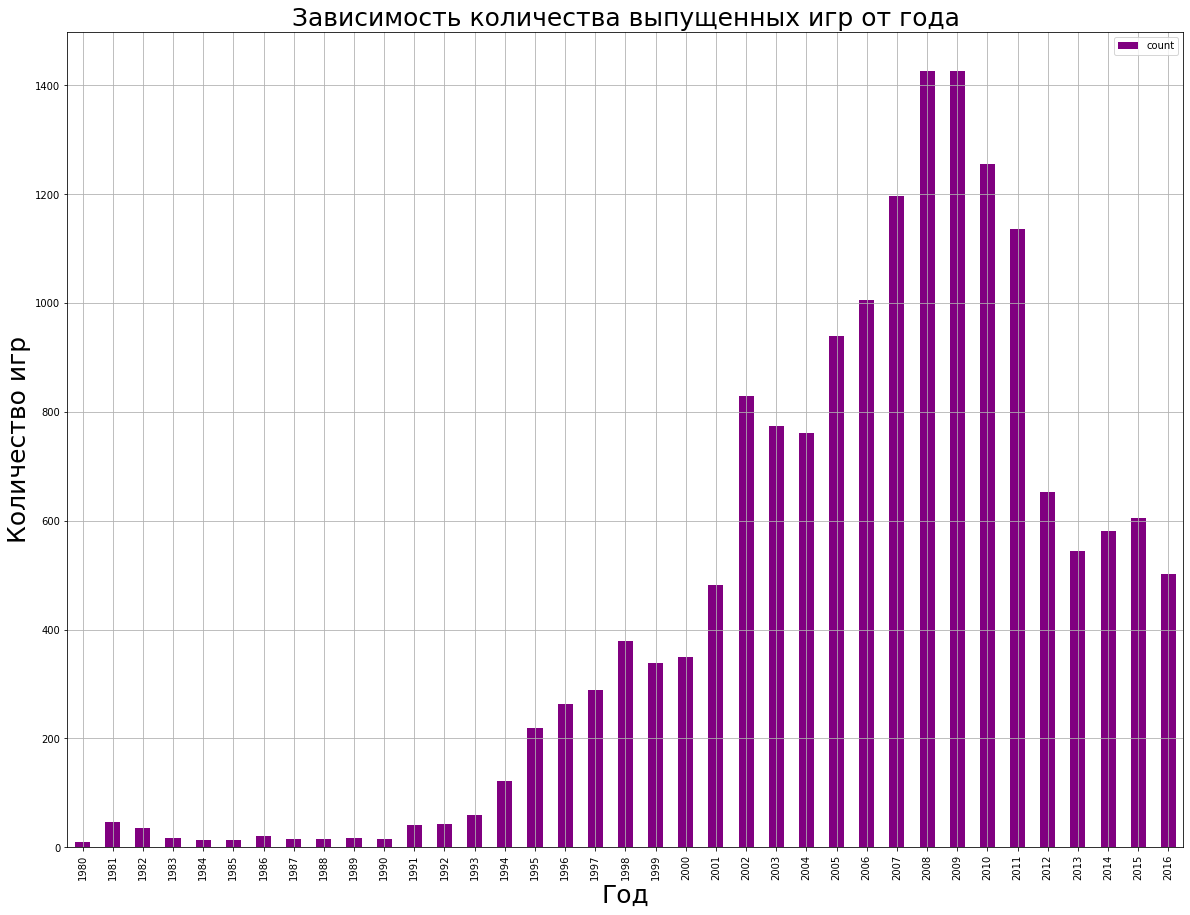

In [24]:
# Построим график по сводной таблице:
games_per_year.plot(y='count', kind='bar', grid=True, figsize=(20, 15), color='purple')
plt.title('Зависимость количества выпущенных игр от года', fontsize=25)
plt.ylabel('Количество игр', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

##### Промежуточный вывод:
Игры начали активно выпускаться и набирать обороты с 1991 года. Игровой "бум" пришёлся на 2008 и 2009 года. В 2011 последовал резкий спад, после которого количество игр, выпускающихся каждый год, примерно одинаково.

#### Исследование игровых платформ

Посмотрим, как менялись продажи по платформам.

In [25]:
# Сводная таблица:
platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
platforms.columns = ['sum_total_sales']
platforms = platforms.sort_values('sum_total_sales', ascending = True)
print(platforms)

          sum_total_sales
platform                 
PCFX                 0.03
GG                   0.04
3DO                  0.10
TG16                 0.16
WS                   1.42
NG                   1.44
SCD                  1.86
DC                  15.95
GEN                 28.35
SAT                 33.59
PSV                 53.81
WiiU                82.19
2600                86.48
XOne               159.32
GC                 196.73
SNES               200.04
N64                218.01
NES                251.05
XB                 251.57
GB                 254.43
PC                 255.76
3DS                257.81
PSP                289.53
GBA                312.88
PS4                314.14
PS                 727.58
DS                 802.78
Wii                891.18
PS3                931.34
X360               961.24
PS2               1233.56


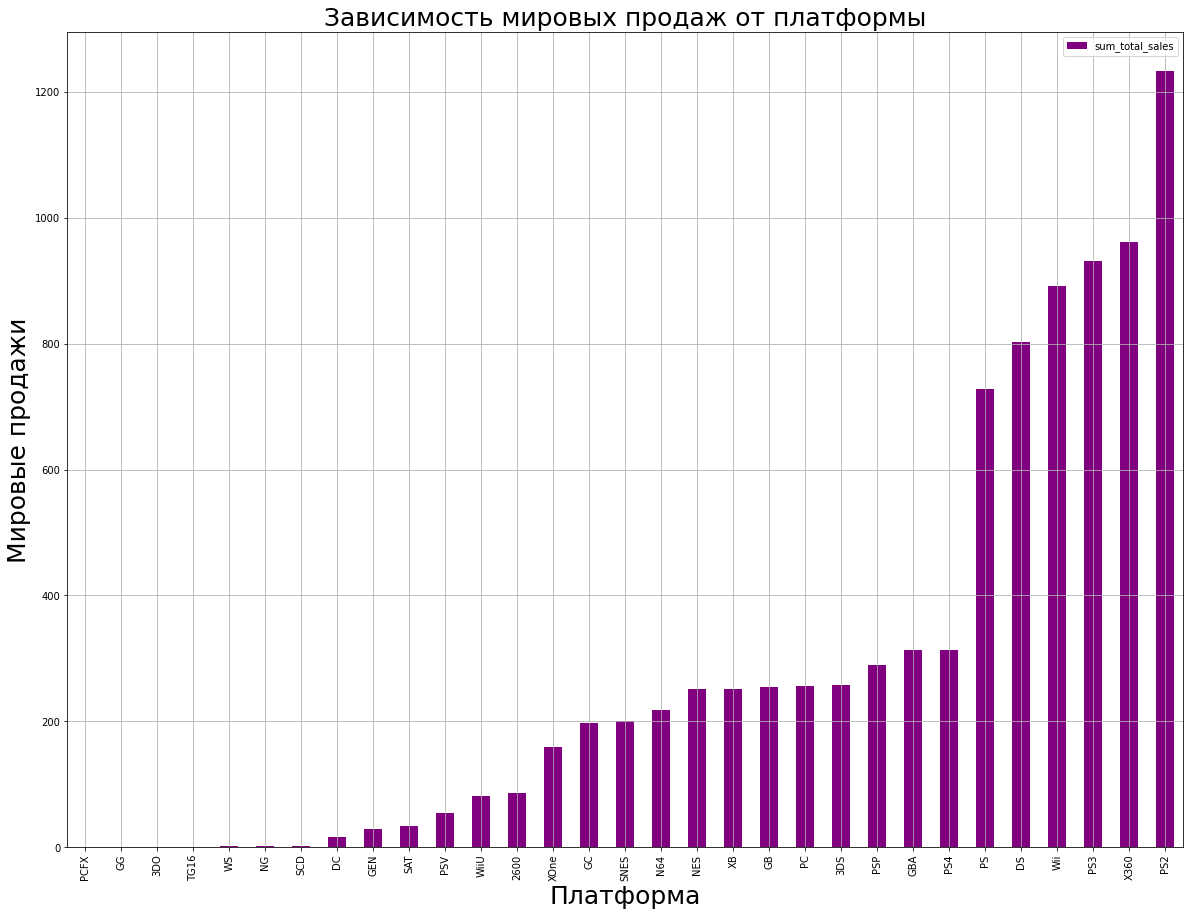

In [26]:
# Построим график по сводной таблице:
platforms.plot(y='sum_total_sales', kind='bar', grid=True, figsize=(20, 15), color='purple')
plt.title('Зависимость мировых продаж от платформы', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Платформа', fontsize=25)
plt.show()

PS2 была революционной приставкой, неудивительно, что максимальную прибыль получили игры, выходящие на этой платформе. Удивительно, что компьютер занимает лишь 11 место в этом рейтинге.

Итак, у нас есть характериный топ-6 платформ. Посмотрим, как изменялись продажи игр для них в зависимости от года.

In [27]:
# Выделим интересующие строки:
ps2_top = df.query('platform == "PS2"')
x360_top = df.query('platform == "X360"')
ps3_top = df.query('platform == "PS3"')
wii_top = df.query('platform == "Wii"')
ds_top = df.query('platform == "DS"')
ps_top = df.query('platform == "PS"')

# Группируем данные по годам:
ps2_top = ps2_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
ps2_top.columns = ['year_of_release', 'total_sales']

x360_top = x360_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
x360_top.columns = ['year_of_release', 'total_sales']

ps3_top = ps3_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
ps3_top.columns = ['year_of_release', 'total_sales']

wii_top = wii_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
wii_top.columns = ['year_of_release', 'total_sales']

ds_top = ds_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
ds_top.columns = ['year_of_release', 'total_sales']

ps_top = ps_top.groupby(['platform', 'year_of_release'])['total_sales'].sum()
ps_top.columns = ['year_of_release', 'total_sales']

По полученным таблицам построим графики. Совмещать их не будем, так как слишком большой объём информации.

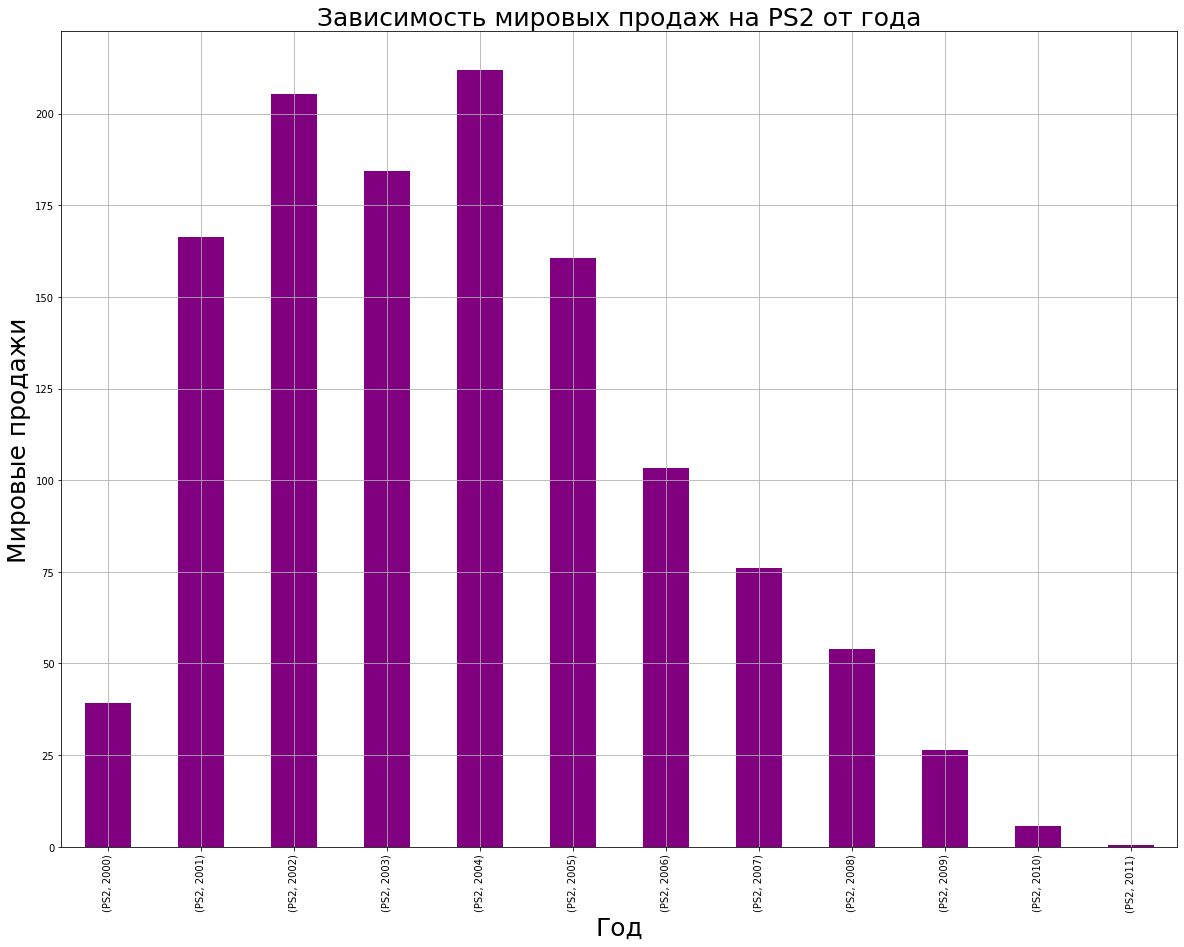

In [28]:
# График PS2:
ps2_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='purple')

plt.title('Зависимость мировых продаж на PS2 от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Наблюдаем 2 значимых пика на 2002 и 2004 год, после них с каждым годом идёт постепенный спад.

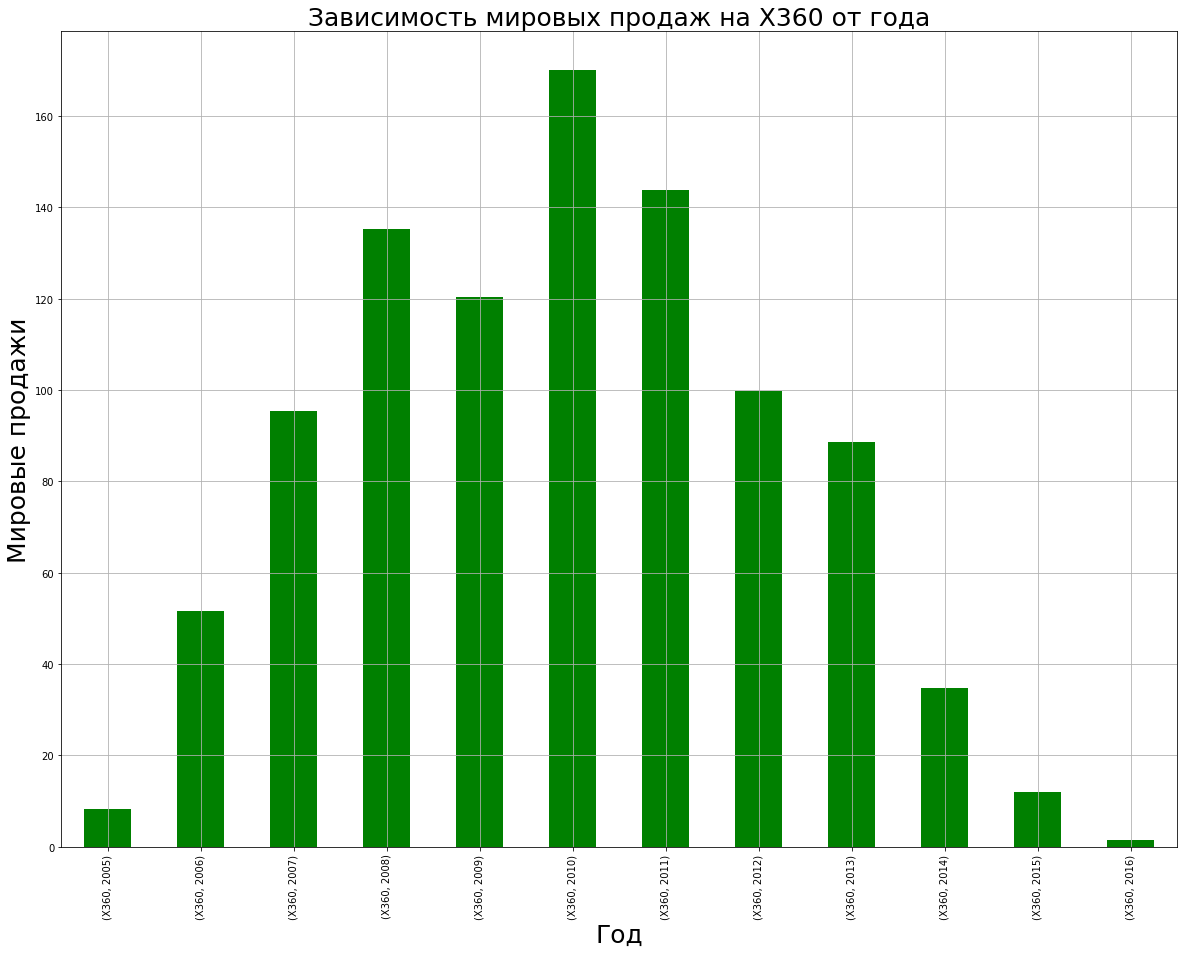

In [29]:
# График X360:
x360_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='green')

plt.title('Зависимость мировых продаж на X360 от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Пик пришёлся на 2010 год, после которого планомерное снижение. В 2014 наблюдаем резкое снижение по продажам.

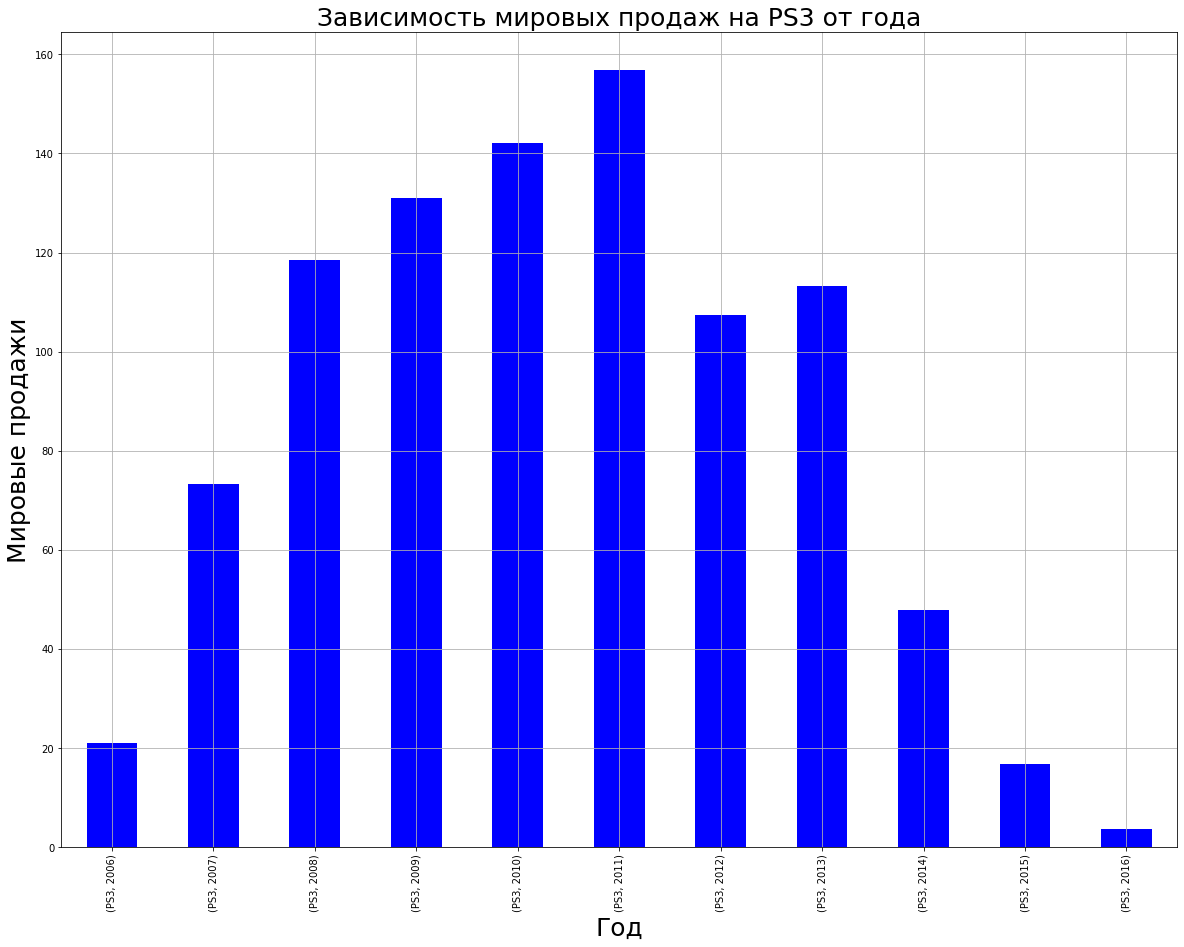

In [30]:
# График PS3:
ps3_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='blue')

plt.title('Зависимость мировых продаж на PS3 от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Пик приходится на 2011 год, такое же резкое снижение в 2014.

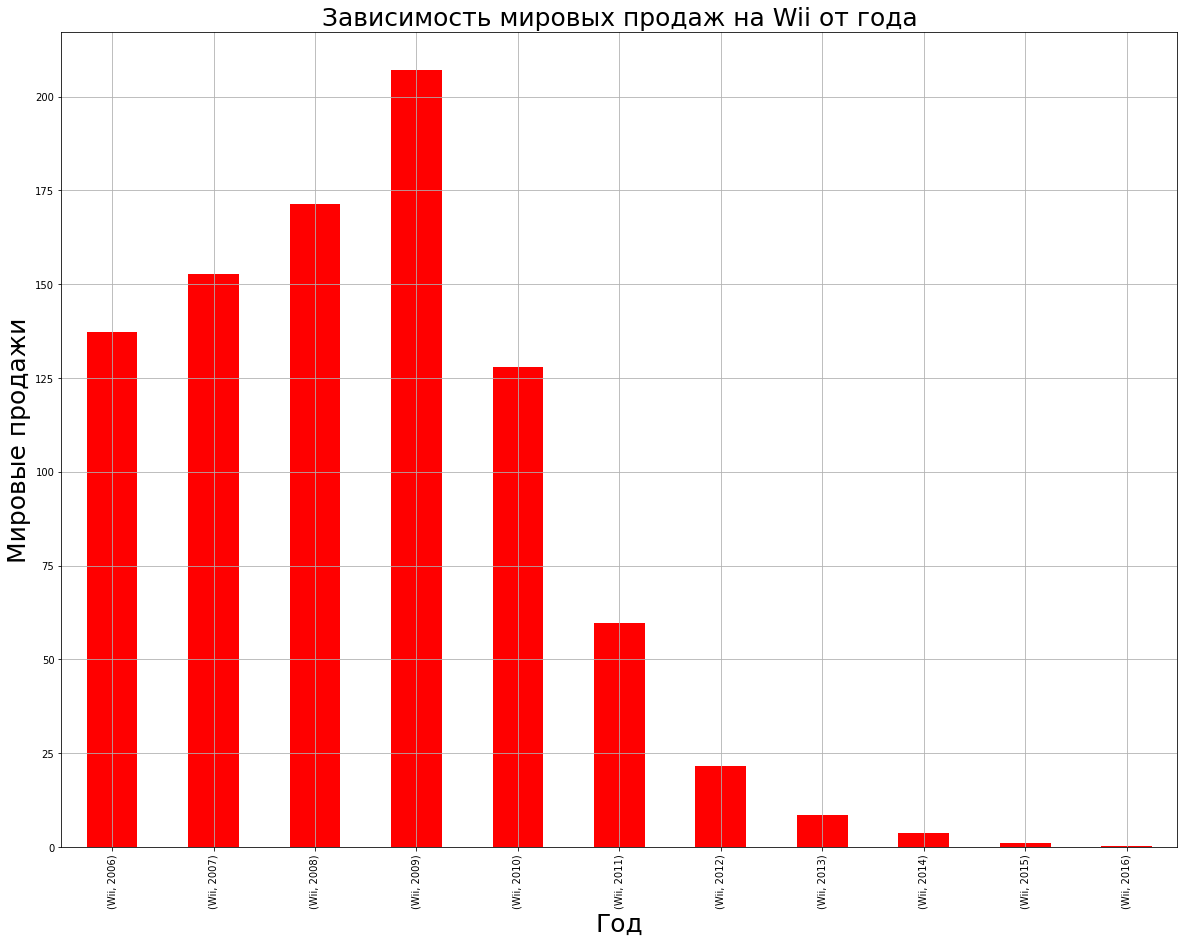

In [31]:
# График Wii:
wii_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='red')

plt.title('Зависимость мировых продаж на Wii от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Пик в 2010 году, после которого достаточно резкое обрушение продаж. К 2016 году платформу можно считать мёртвой.

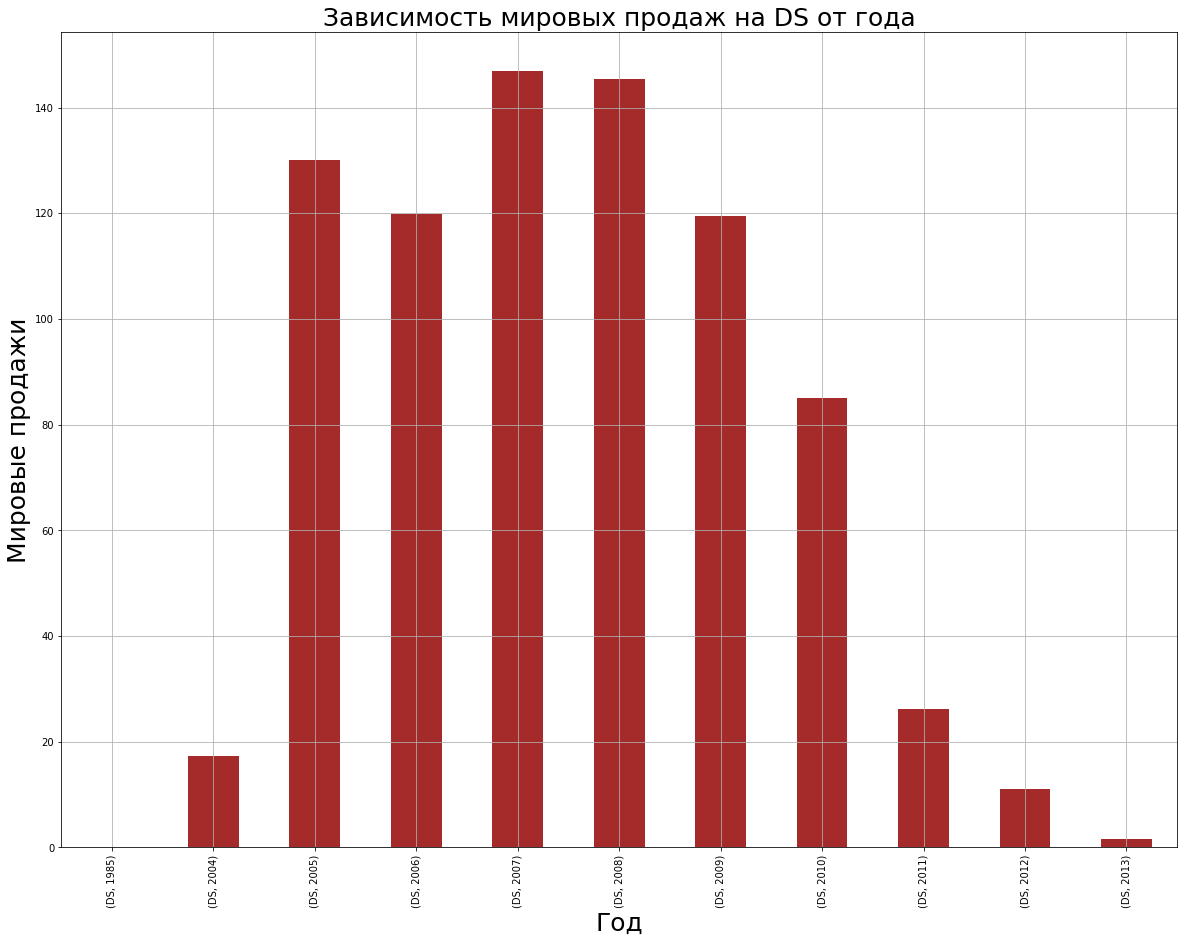

In [32]:
# График DS:
ds_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='brown')

plt.title('Зависимость мировых продаж на DS от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Пик в 2007 и 2008 годах, к 2013 году платформа себя изжила.

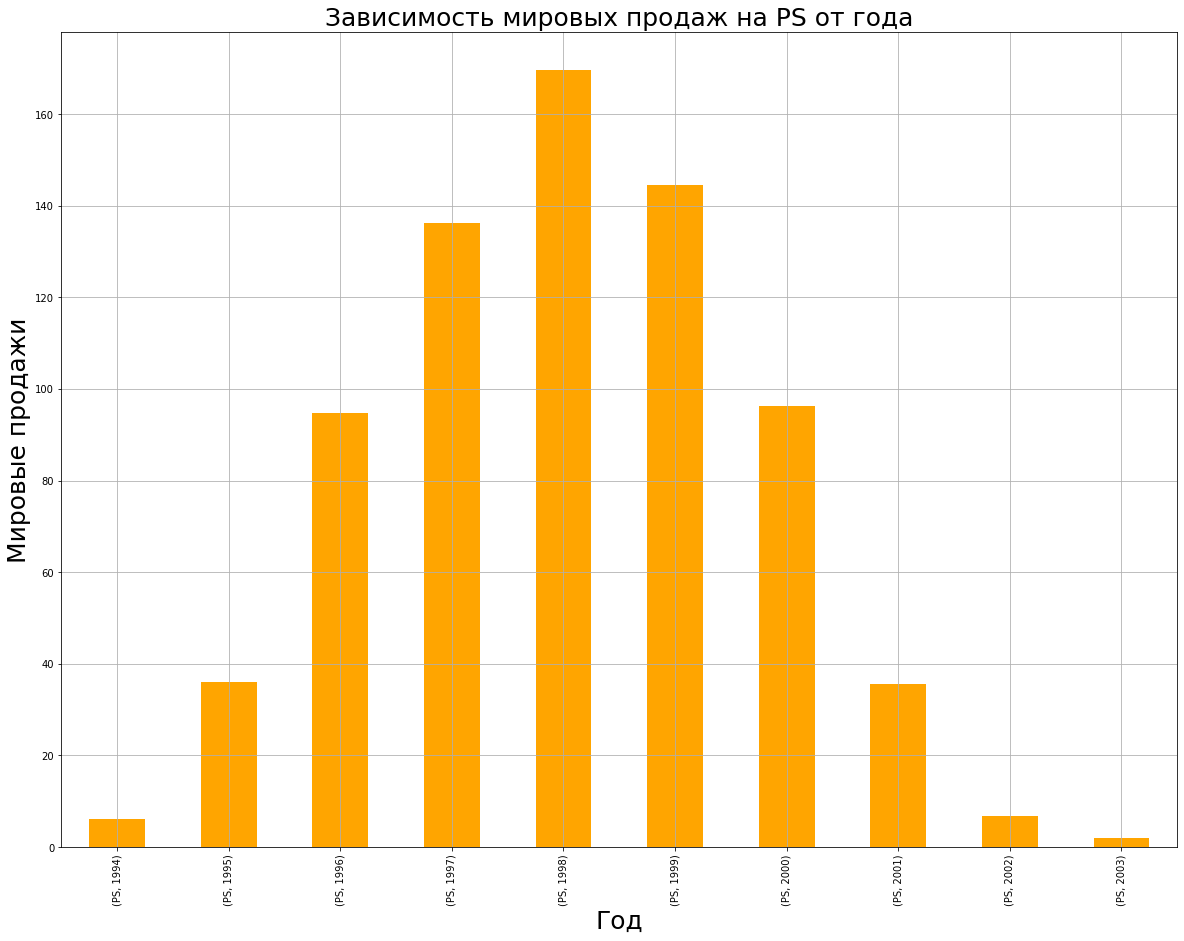

In [33]:
# График PS:
ps_top.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='orange')

plt.title('Зависимость мировых продаж на PS от года', fontsize=25)
plt.ylabel('Мировые продажи', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.show()

Пик в 1998 году, к 2004 году платформа перестала функционировать.

In [34]:
# Посчитаем средний срок жизни платформ:
ps_live = len(df.query('platform == "PS"')['year_of_release'].unique())
ds_live = len(df.query('platform == "DS"')['year_of_release'].unique())
wii_live = len(df.query('platform == "Wii"')['year_of_release'].unique())
ps2_live = len(df.query('platform == "PS2"')['year_of_release'].unique())
x360_live = len(df.query('platform == "X360"')['year_of_release'].unique())
ps3_live = len(df.query('platform == "PS3"')['year_of_release'].unique())

print('Средняя продолжительность жизни платформы:', (ps_live + ds_live + wii_live + ps2_live + x360_live + ps3_live)/6)

Средняя продолжительность жизни платформы: 11.166666666666666


##### Промежуточный вывод:
Игры начали активно выпускаться и набирать обороты с 1991 года. Игровой "бум" пришёлся на 2008 и 2009 года. В 2011 последовал резкий спад, после которого количество игр, выпускающихся каждый год, примерно одинаково.

По статистике игры, выходящие на 6 платформах, за всё время получили больше всего продаж. Были разобраны все 6 платформ по продажам по разным годам. Результаты следующие:
  - на PS игры начали продаваться с 1994 года, пик пришёлся на 1998, после него резкий спад, к 2004 году игры уже не продавались;
  - PS2 перехватила эстафету в 2000 году, пик на 2002 и 2004 года, спад начался в 2006, к 2012 игры не продавались;
  - на DS начали что-то продавать в 2004, с 2005 по 2009 стабильные продажи, далее спад, к 2014 ничего не продавалось;
  - на X360 начались продажи в 2004, пик пришёлся на 2010, к 2016 году продажи многократно упали;
  - Wii стартовала в 2006 сразу с хороших продаж, пик на 2009 год, далее спад и практическая смерть к 2016;
  - на PS3 продажи начались в 2006, пик пришёлся на 2011. В 2014 сильное падение продаж, далее постепенный спад.
  
По общей картине можно сказать, что платформы постоянно сменяют друг друга, пики продаж игр практически никогда не совпадают, а высокий уровень продаж держится в среднем 5 лет подряд, после чего происходит спад. В 2014 году у всех "современных" платформ наблюдается резкое снижение. Причина не понятна, так как выпуск игр сократился ещё в 2012. Возможно, к 14 году были доделаны все обещанные ранее проекты, а дальше на игровом рынке началась зима. Либо дело в самих студиях разработки и новых технологиях, невозможность реализовать идеи или их отсутствие. Также есть вероятность того, что начали развиваться новые платформы, которые подвинули старых фаворитов.

Средний срок функционирования платформы составляет 11 лет.

#### Определение актуального периода

Для составления прогноза на 2017 год необходимо использовать информацию за актуальный период. Из предыдущего пункта стало понятно, что в 2014 году произошли критические изменения, поэтому отсортируем данные, оставив только игры 2014-2016 годов.

In [35]:
# Создание таблицы с актуальными данными:
current_df = df.query('year_of_release == 2014 or year_of_release == 2015 or year_of_release == 2016')
current_df.info()
print(current_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 171.5+ KB
                                         name platform  year_of_release  \
31                  call of duty: black ops 3      PS4             2015   
42                         grand 

Строк немного, но для анализа подойдёт. Кстати, проверим теорию про новые платформы, смещающие старые.

In [36]:
current_df['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Действительно, топ-3 занимают платформы, которые ранее не рассматривались. Разберём их подробнее.

In [37]:
# Составим сводную таблицу:
cur_tot_sales = current_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
cur_tot_sales.columns = ['total_sales']
cur_tot_sales = cur_tot_sales.sort_values('total_sales', ascending = True)

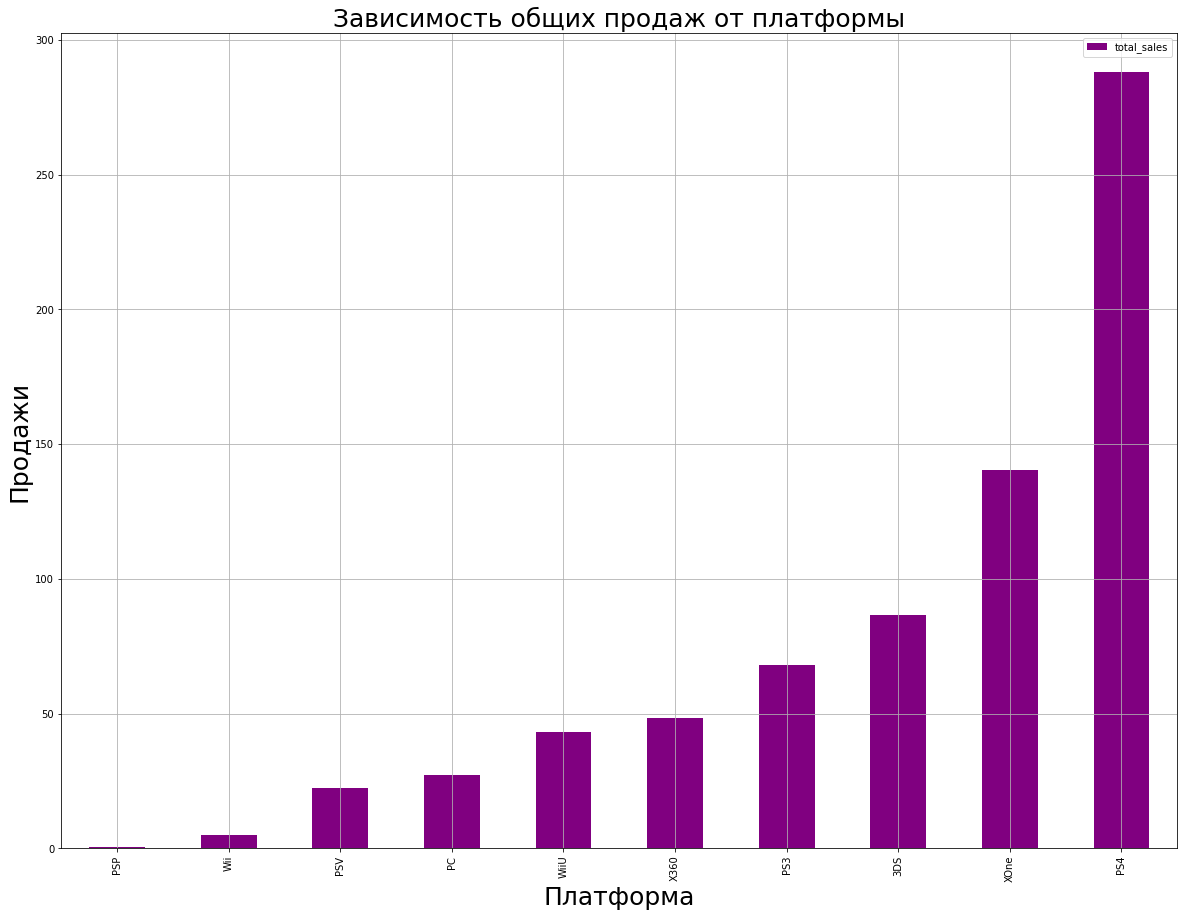

In [38]:
# Построим график по сводной таблице:
cur_tot_sales.plot(y='total_sales', kind='bar', grid=True, figsize=(20, 15), color='purple')
plt.title('Зависимость общих продаж от платформы', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформа', fontsize=25)
plt.show()

Выделяется явный лидер - платформа PS4. Хоть и слабую, но конкруенцию ей составляет XOne, остальные платформы по количеству продаж идут на спад.

##### Промежуточный вывод:
Был выделен актуальный период в жизни игрового рынка: 2014-2016 года. Опираясь на него, можно построить прогнозы на 2017 год. Оказалось, что спад лидирующих платформ произошёл из-за появления новых. Основной вклад внесли PS4 и XOne.

#### Определение прибыльности платформ

Из предыдущего пункта уже было выяснено, что наиболее успешными в актуальном периоде являлись PS4 и XOne. Выведем более подробные данные о проектах на этих платформах.

In [39]:
# Вывод данных о PS4 за 2014 год:
print('Количество проектов за 2014:', current_df.query('year_of_release == 2014 and platform == "PS4"')['total_sales'].count())
print('Продажи за 2014:', current_df.query('year_of_release == 2014 and platform == "PS4"')['total_sales'].sum())

Количество проектов за 2014: 75
Продажи за 2014: 100.00000000000001


In [40]:
# Вывод данных о XOne за 2014 год:
print('Количество проектов за 2014:', current_df.query('year_of_release == 2014 and platform == "XOne"')['total_sales'].count())
print('Продажи за 2014:', current_df.query('year_of_release == 2014 and platform == "XOne"')['total_sales'].sum())

Количество проектов за 2014: 61
Продажи за 2014: 54.06999999999999


In [41]:
# Вывод данных о PS4 за 2015 год:
print('Количество проектов за 2015:', current_df.query('year_of_release == 2015 and platform == "PS4"')['total_sales'].count())
print('Продажи за 2015:', current_df.query('year_of_release == 2015 and platform == "PS4"')['total_sales'].sum())

Количество проектов за 2015: 137
Продажи за 2015: 118.89999999999999


In [42]:
# Вывод данных о XOne за 2015 год:
print('Количество проектов за 2015:', current_df.query('year_of_release == 2015 and platform == "XOne"')['total_sales'].count())
print('Продажи за 2015:', current_df.query('year_of_release == 2015 and platform == "XOne"')['total_sales'].sum())

Количество проектов за 2015: 80
Продажи за 2015: 60.14


##### Промежуточный вывод:
Видим из показателей, что предыдущие выводы оказались верными: количество проектов, а, следовательно, и выручка за них растёт. Значит, для максимальной прибыли следует разрабатывать игры для этих платформ.

#### Подробное рассмотрение продаж игр в разбивке по платформам

Ранее уже определили актуальный период, а также 2 явных фаворита. Построим для отсортированных данных диаграммы размаха по продажам.

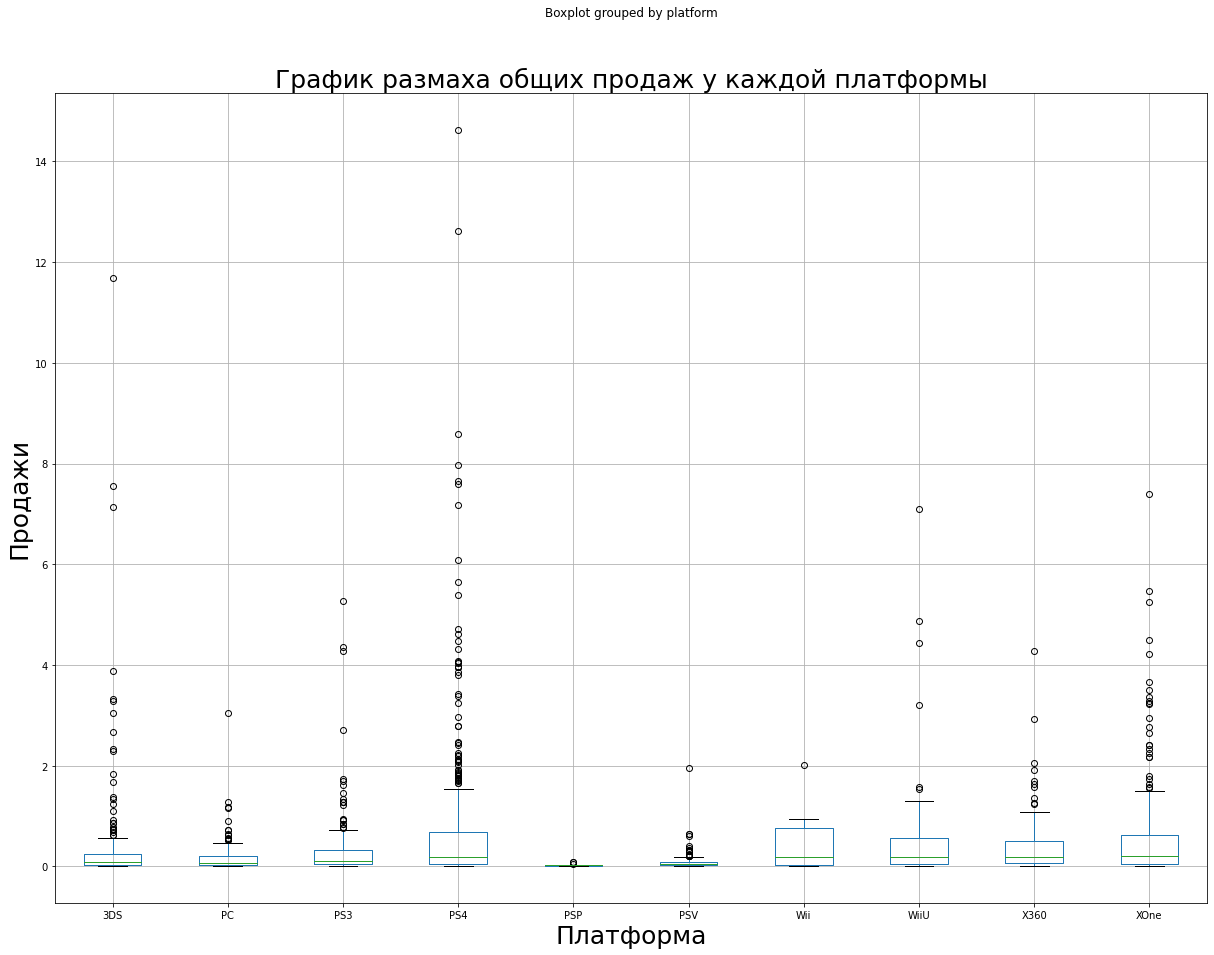

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [43]:
# Диаграмма размаха:
current_df.boxplot(column='total_sales', by='platform', figsize=(20, 15))
plt.title('График размаха общих продаж у каждой платформы', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформа', fontsize=25)
plt.show()
current_df.groupby('platform')['total_sales'].describe()

Учитывая большое количество выбросов, для лучшей визуализации зададим ограничение на полные продажи.

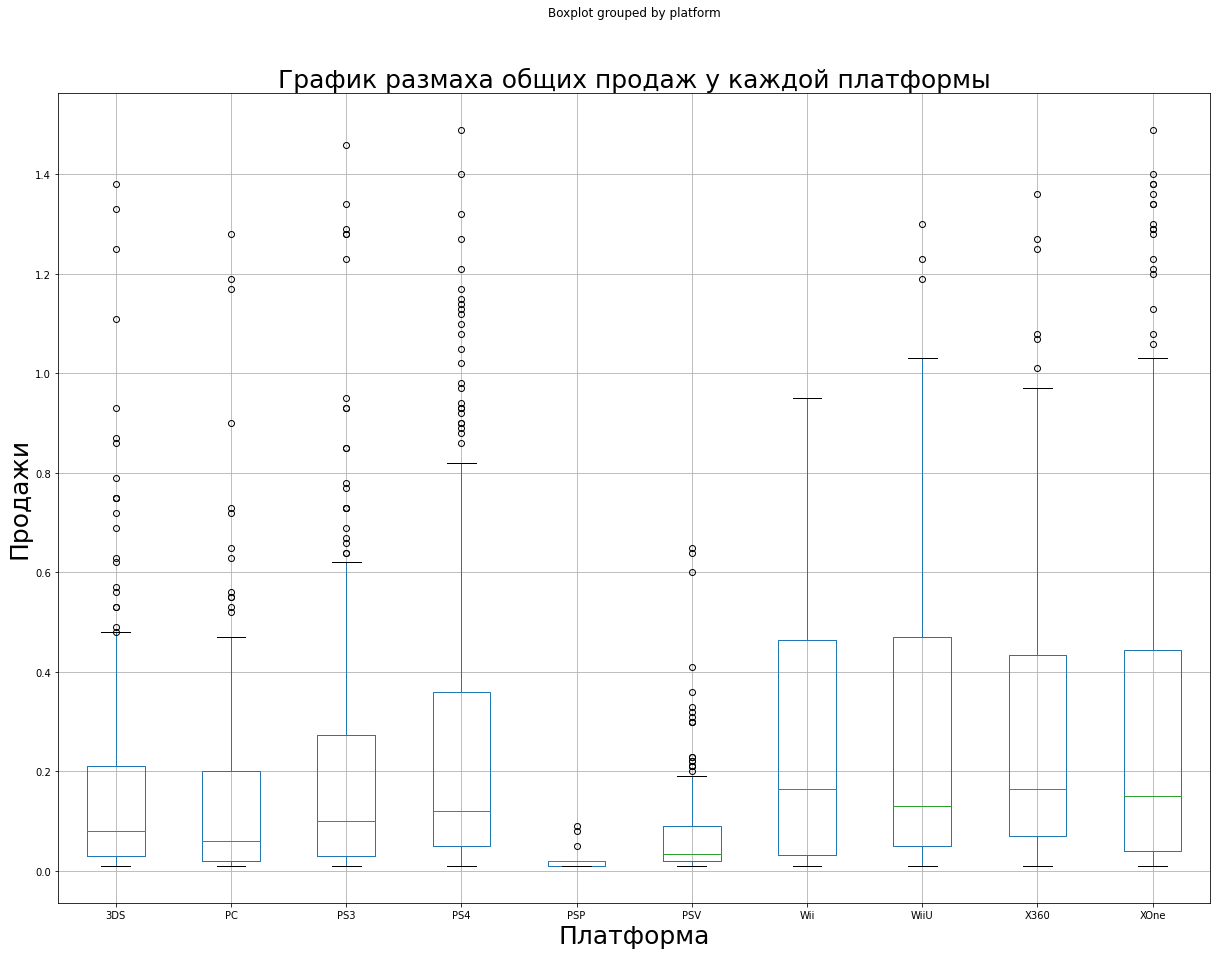

In [44]:
# Графики размаха с ограничениями:
current_df[current_df['total_sales'] <= 1.5].boxplot(column='total_sales', by='platform', figsize=(20, 15))
plt.title('График размаха общих продаж у каждой платформы', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформа', fontsize=25)
plt.show()

##### Промежуточный вывод:
Безусловно, выбросы присутствуют, однако это наверняка какие-то реальные проекты, которые смогли "выстрелить". Больше всего (и крупнее по доходу) их оказалось для платформы PS4, следующие значительные выбросы были у 3DS (судя по всему, благодаря ним эта платформа и оказалась в топ-3 по продажам на диаграмме из предыдущих пунктов), XOne на третьем месте по значимым выбросам. По среднему чеку оказалось, что WiiU несильно уступает XOne, хотя общие продажи значительно ниже. Занятно, что минимальная сумма на всех платформах составляет 0,01. Получается, есть некоторая стартовая цена для всего рынка в целом.

#### Влияние оценок пользователей и критиков на продажи

Для выполнения этой задачи необходимо будет построить диаграммы рассеяния. Строить будем для PS4, XOne и 3DS. Однако стоит учитывать, что в исходной таблице было много пробелов, которые были заменены выдающимися значениями. Для полноты анализа необходимо исключить их и проанализировать то, что есть.

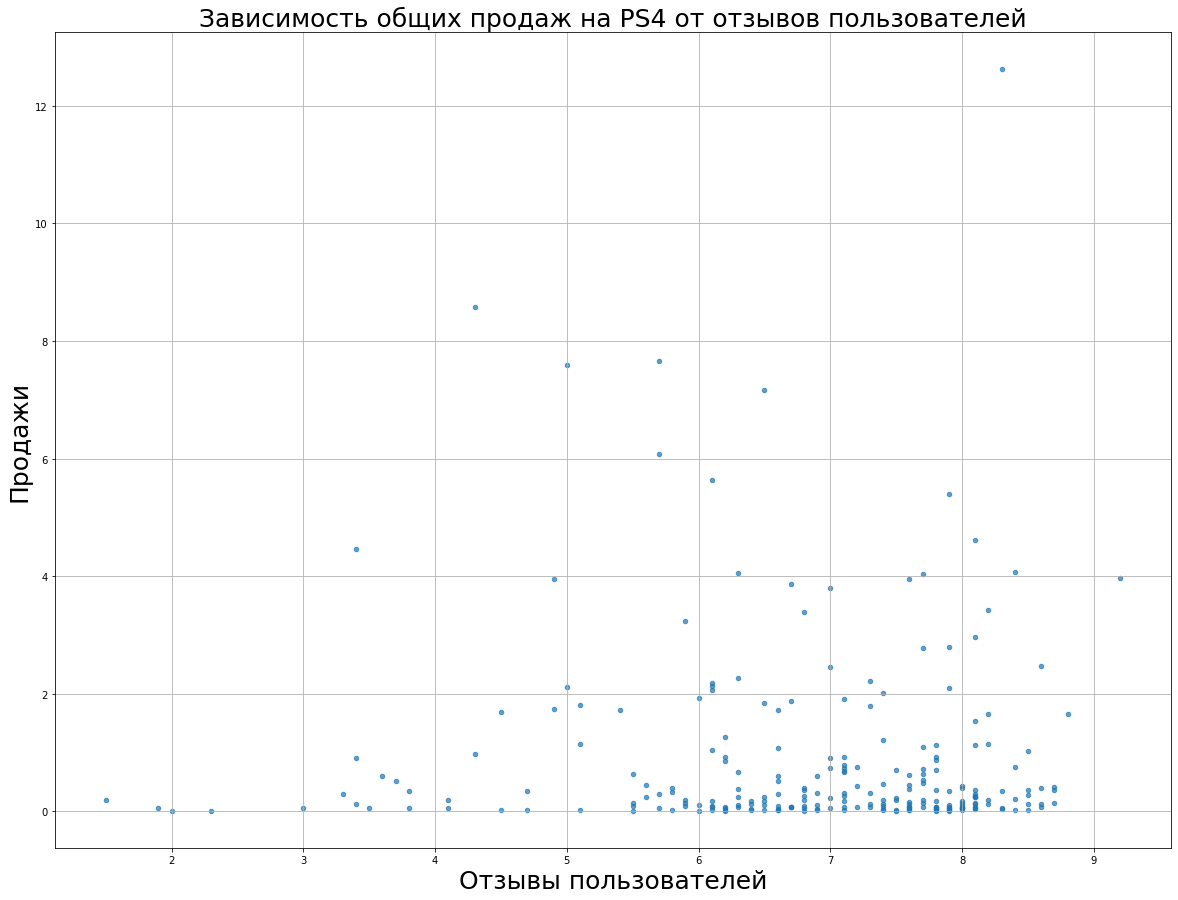

-0.040131589472697356

In [45]:
# Диаграммы рассеяния по оценкам пользователей для PS4:
current_df[(current_df['platform']=='PS4') & (current_df['user_score']>=0)].plot(x='user_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на PS4 от отзывов пользователей', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы пользователей', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='PS4') & (current_df['user_score']>=0)]['user_score'].corr(current_df['total_sales'])

Коэффициент говорит о том, что линейной связи нет.

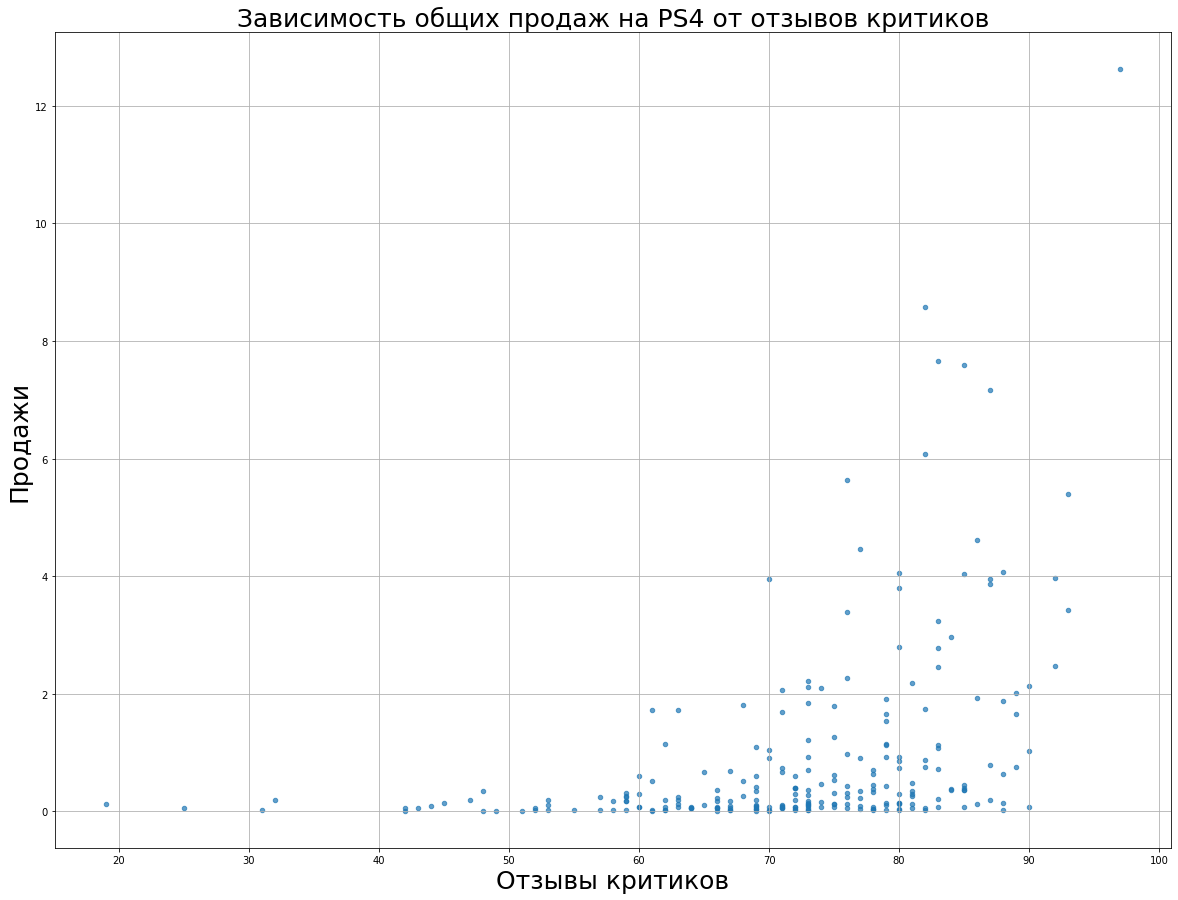

0.40266141068104083

In [46]:
# Диаграммы рассеяния по оценкам критиков для PS4:
current_df[(current_df['platform']=='PS4') & (current_df['critic_score']>=0)].plot(x='critic_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на PS4 от отзывов критиков', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы критиков', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='PS4') & (current_df['critic_score']>=0)]['critic_score'].corr(current_df['total_sales'])

Коэффициент говорит о том, что связь слабая положительная.

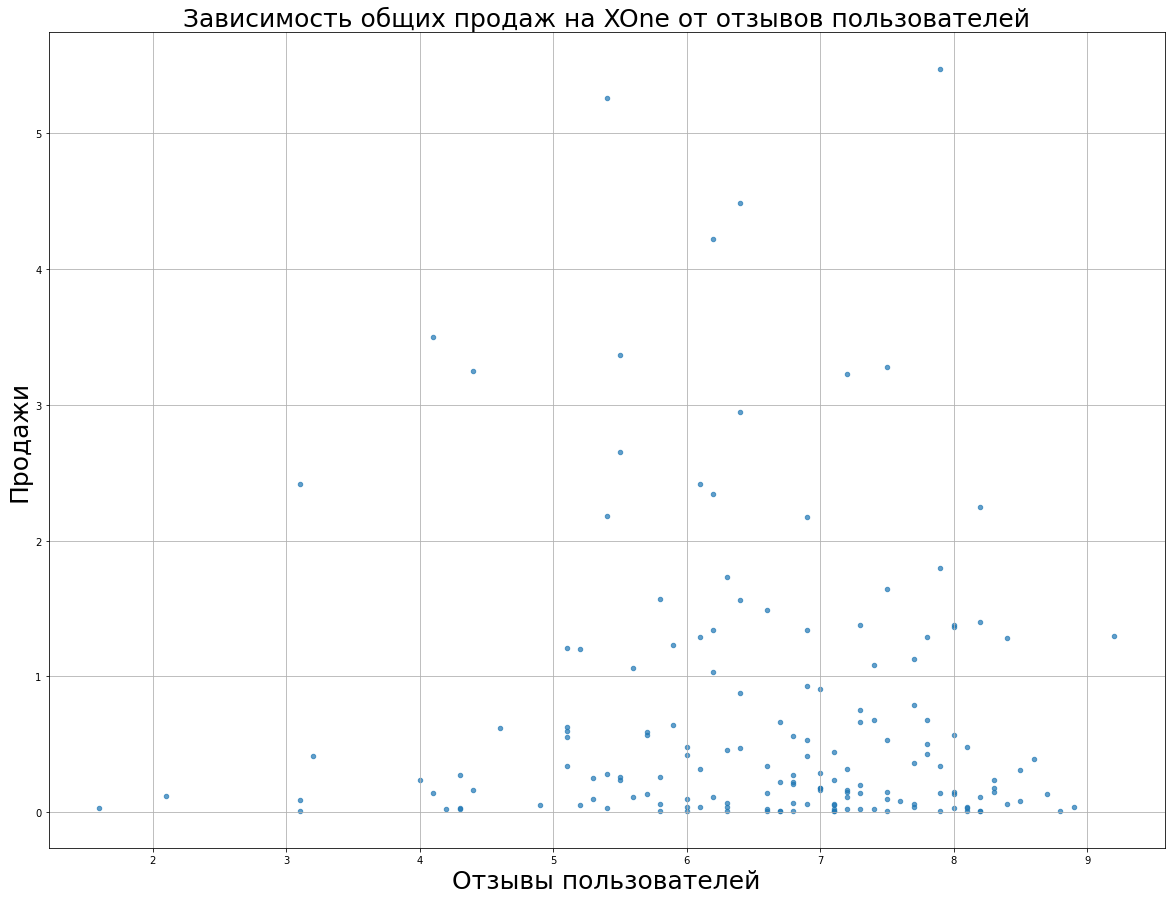

-0.0703839280647581

In [47]:
# Диаграммы рассеяния по оценкам пользователей для XOne:
current_df[(current_df['platform']=='XOne') & (current_df['user_score']>=0)].plot(x='user_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на XOne от отзывов пользователей', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы пользователей', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='XOne') & (current_df['user_score']>=0)]['user_score'].corr(current_df['total_sales'])

Коэффициент говорит о том, что линейной связи нет.

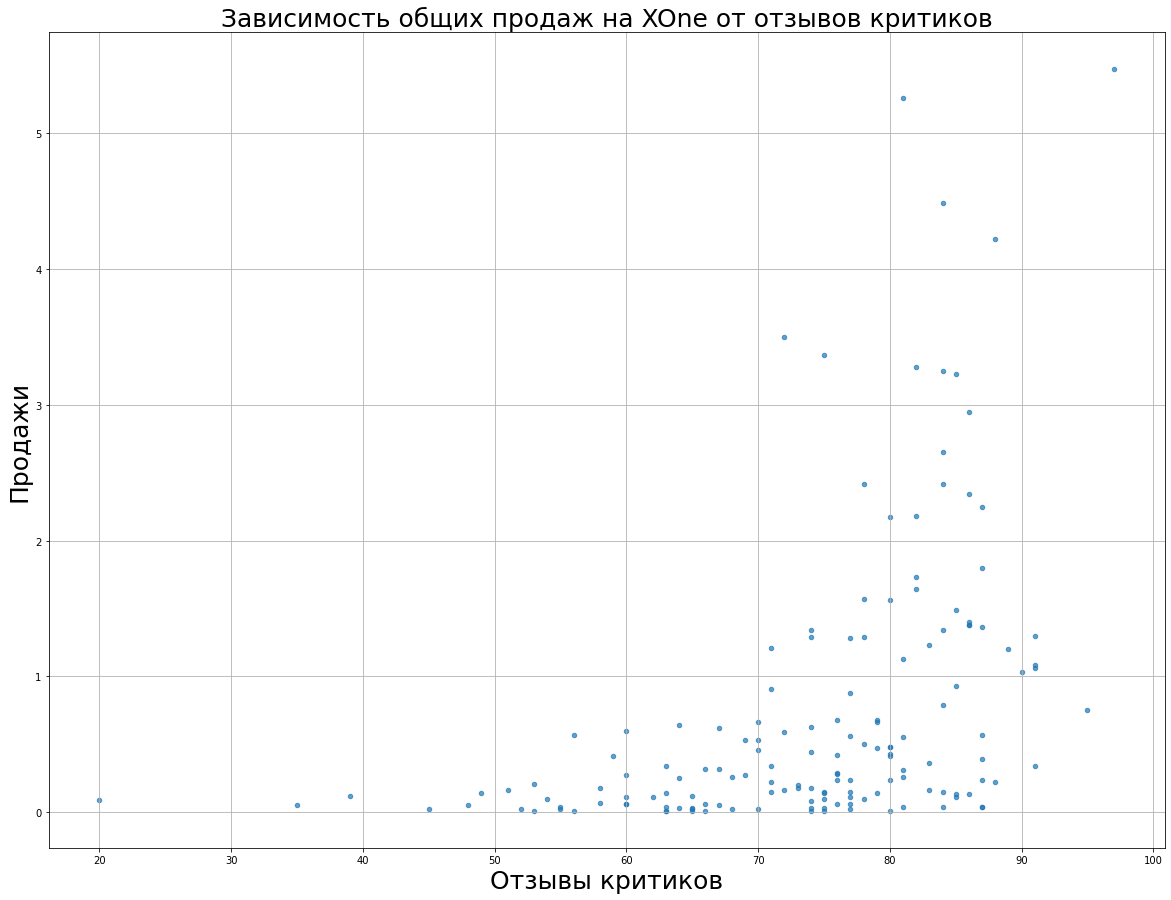

0.42867694370333226

In [48]:
# Диаграммы рассеяния по оценкам критиков для XOne:
current_df[(current_df['platform']=='XOne') & (current_df['critic_score']>=0)].plot(x='critic_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на XOne от отзывов критиков', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы критиков', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='XOne') & (current_df['critic_score']>=0)]['critic_score'].corr(current_df['total_sales'])

Критерий говорит о том, что связь слабая положительная.

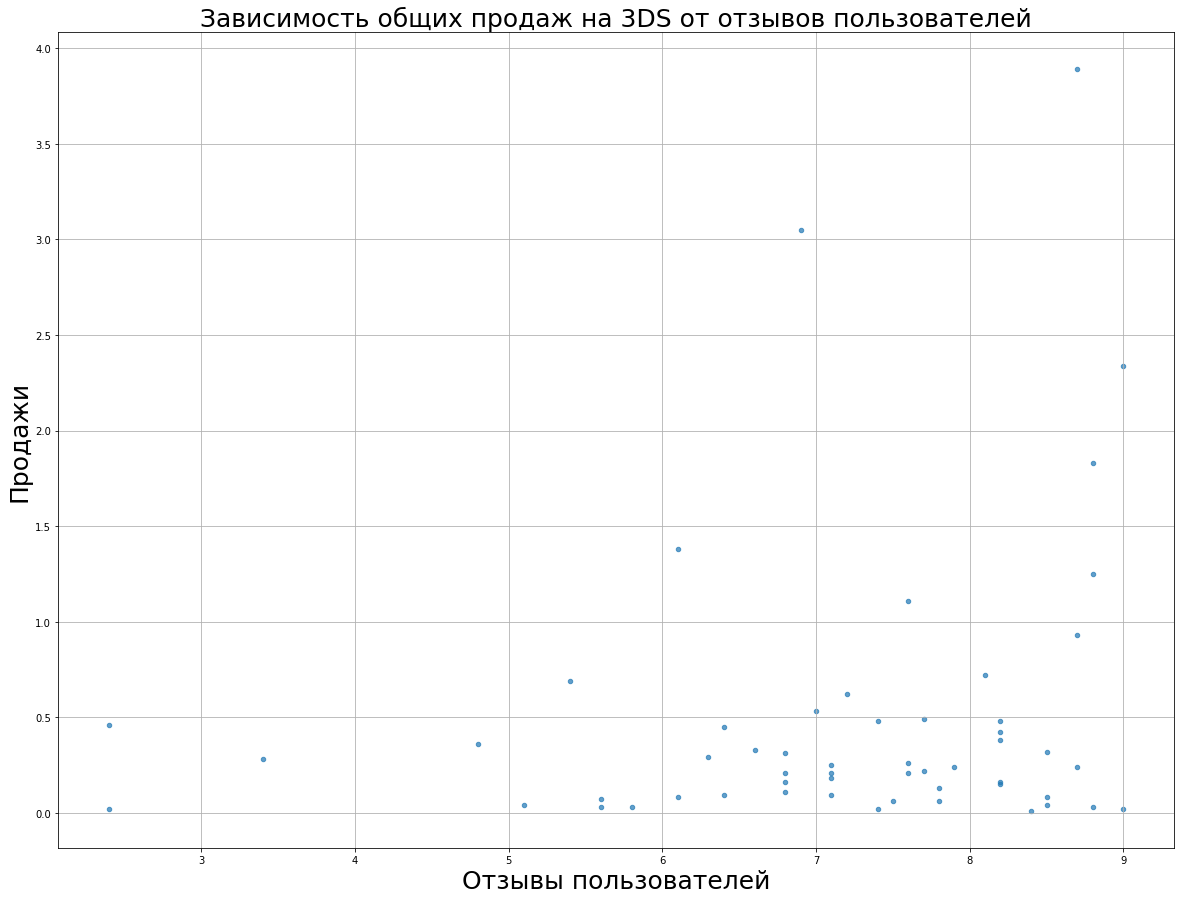

0.2151932718527028

In [49]:
# Диаграммы рассеяния по оценкам пользователей для 3DS:
current_df[(current_df['platform']=='3DS') & (current_df['user_score']>=0)].plot(x='user_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на 3DS от отзывов пользователей', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы пользователей', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='3DS') & (current_df['user_score']>=0)]['user_score'].corr(current_df['total_sales'])

Связь слабая положительная.

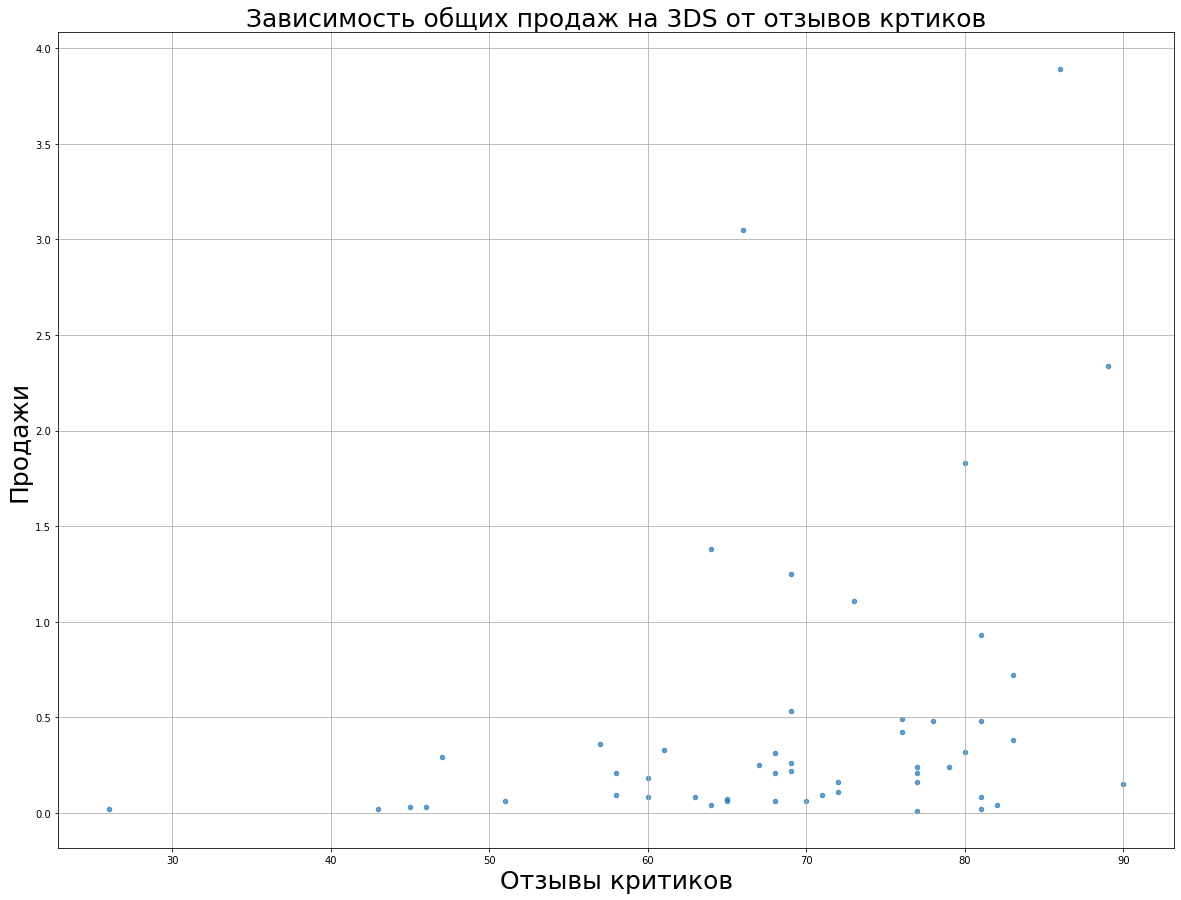

0.314117492869051

In [51]:
# Диаграммы рассеяния по оценкам пользователей для 3DS:
current_df[(current_df['platform']=='3DS') & (current_df['critic_score']>=0)].plot(x='critic_score', 
                                                                                 y='total_sales', 
                                                                                 kind='scatter', 
                                                                                 figsize=(20, 15),
                                                                                 alpha=0.7,
                                                                                 grid=True)
plt.title('Зависимость общих продаж на 3DS от отзывов кртиков', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Отзывы критиков', fontsize=25)
plt.show()

# Посчитаем коэффициент корреляции для данных параметров:
current_df[(current_df['platform']=='3DS') & (current_df['critic_score']>=0)]['critic_score'].corr(current_df['total_sales'])

Связь слабая положительная.

##### Промежуточный вывод:
Как оказалось, отзывы и продажи не имеют между собой прямой связи (оценки пользователей вообще никак не влияют на показатель продаж на самых популрных платформах, оценки критиков имеют слабую связь с ними).

#### Сравнение с другими платформами

Для этого пункта будет достаточно составить одну таблицу с показателями продаж по всем платформам за всё время.

In [52]:
# Показатели продаж по всем платформам:
df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


##### Промежуточный вывод:
Видим, что по средним показателям нынешним фаворитам есть куда расти, хотя, учитывая года активности всех эти платформ, можно с уверенностью сказать, что рынок только растёт, значит, PS4 и XOne могут в несколько раз превзойти предшественников по прибыли. Интересно, что есть 2 платформы, на которых зарегестрировано лишь по 1 игре.

#### Общее распределение игр по жанрам

Сгруппируем актуальные данные по жанрам и построим по ним гистограмму.

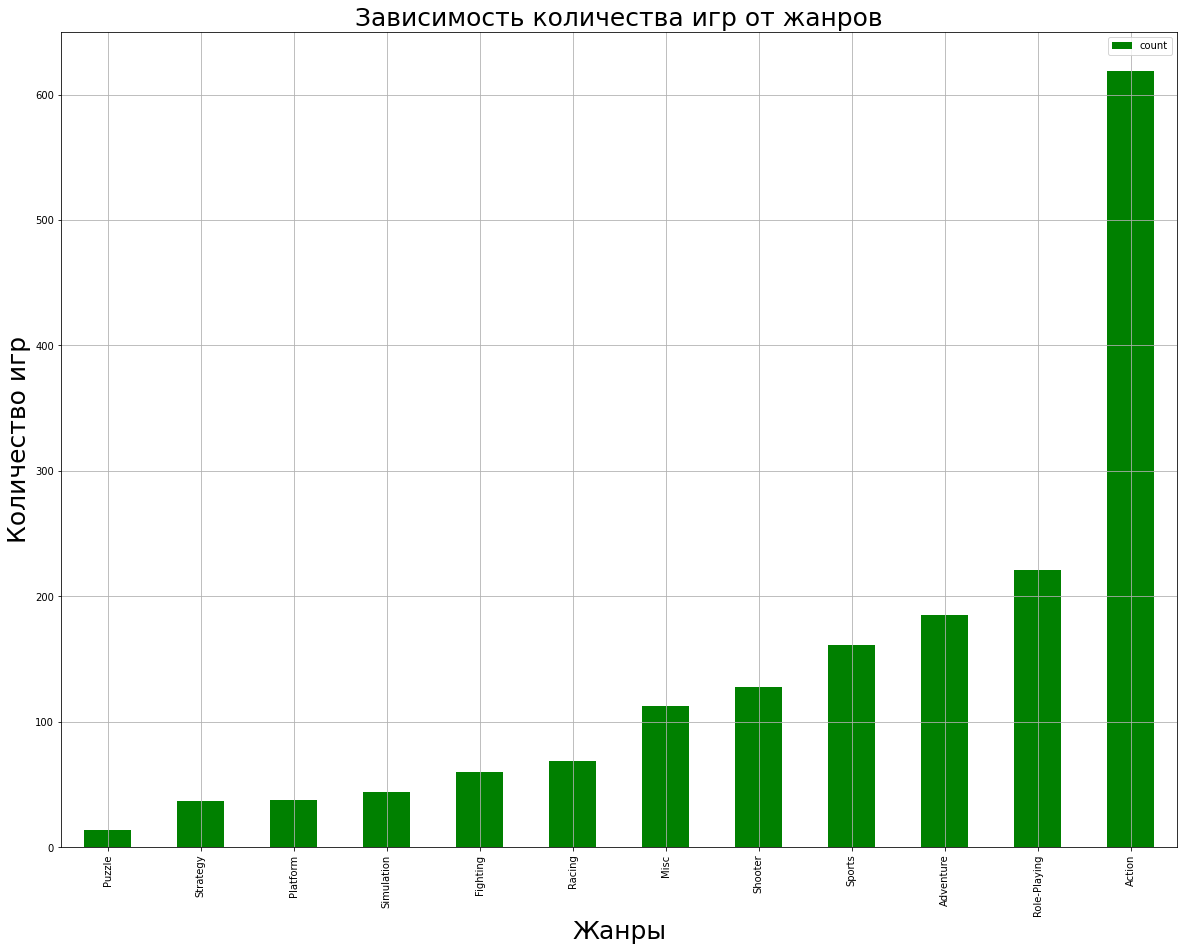

In [53]:
# Построение графика зависимости количества проектов от жанра:
df_genre_count = current_df.pivot_table(index='genre', values='name', aggfunc='count')
df_genre_count.columns = ['count']
df_genre_count = df_genre_count.sort_values('count', ascending=True)
df_genre_count.plot(y='count', kind='bar', figsize=(20, 15), grid=True, color='green')
plt.title('Зависимость количества игр от жанров', fontsize=25)
plt.ylabel('Количество игр', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

Action-игры многократно превосходят остальные жанры. Самыми непопулярными являются пазлы.

А теперь посмотрим показатели по общим продажам.

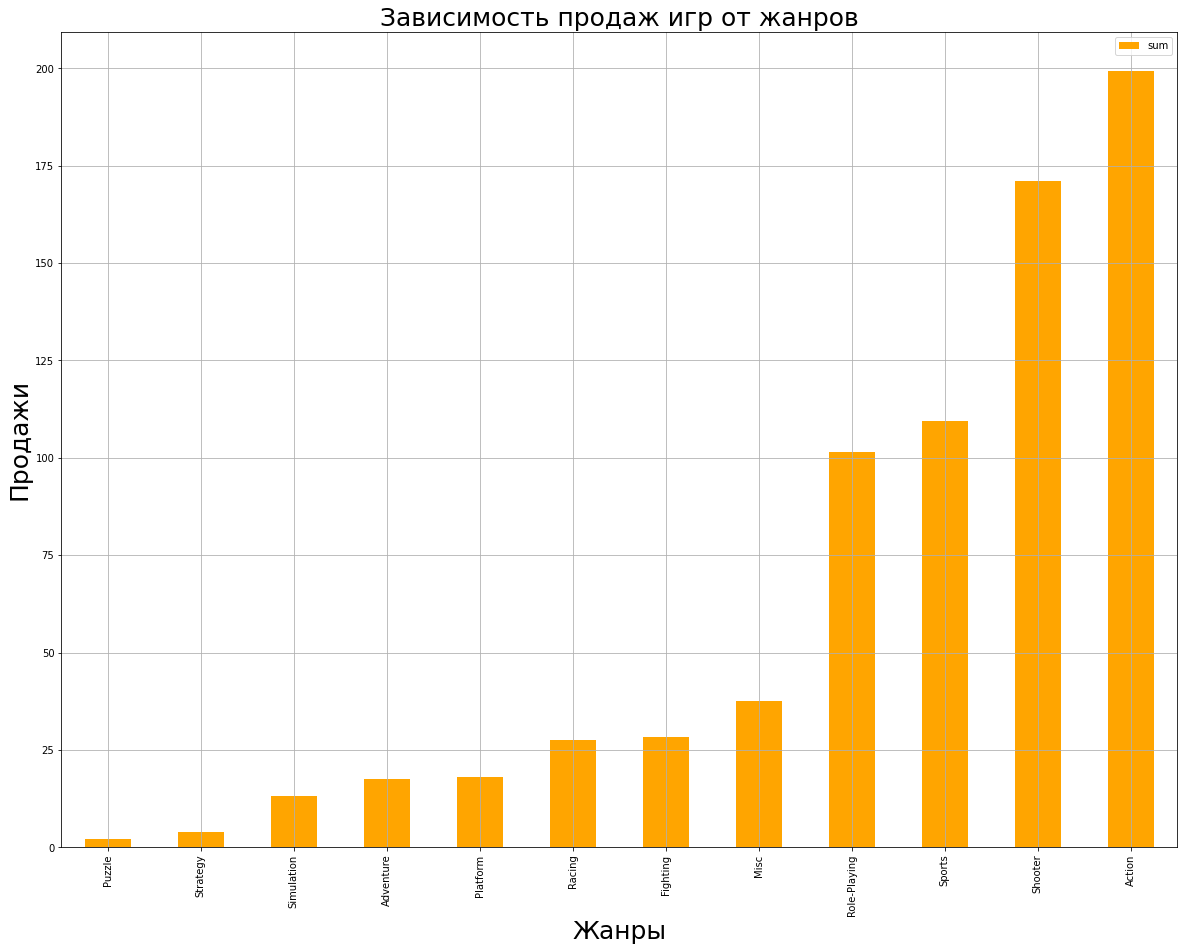

In [54]:
# Построение графика зависимости общих продаж от жанра:
df_ts_sum = current_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
df_ts_sum.columns = ['sum']
df_ts_sum = df_ts_sum.sort_values('sum', ascending=True)
df_ts_sum.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='orange')
plt.title('Зависимость продаж игр от жанров', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

А вот тут уже интересно. Action так же занимает топ-1 и по продажам, но шутеры отстают от них лишь на 15%, при том, что выпускается их чуть ли не в 6 раз меньше. Топ-3 и топ-4 с небольшой разницей занимают спортивные игры и рпг соответственно. Остальные жанры сильно уступают первым четырём. На последнем месте, как ни странно, пазлы.

Построим график зависимости медианных продаж в зависимости от жанра.

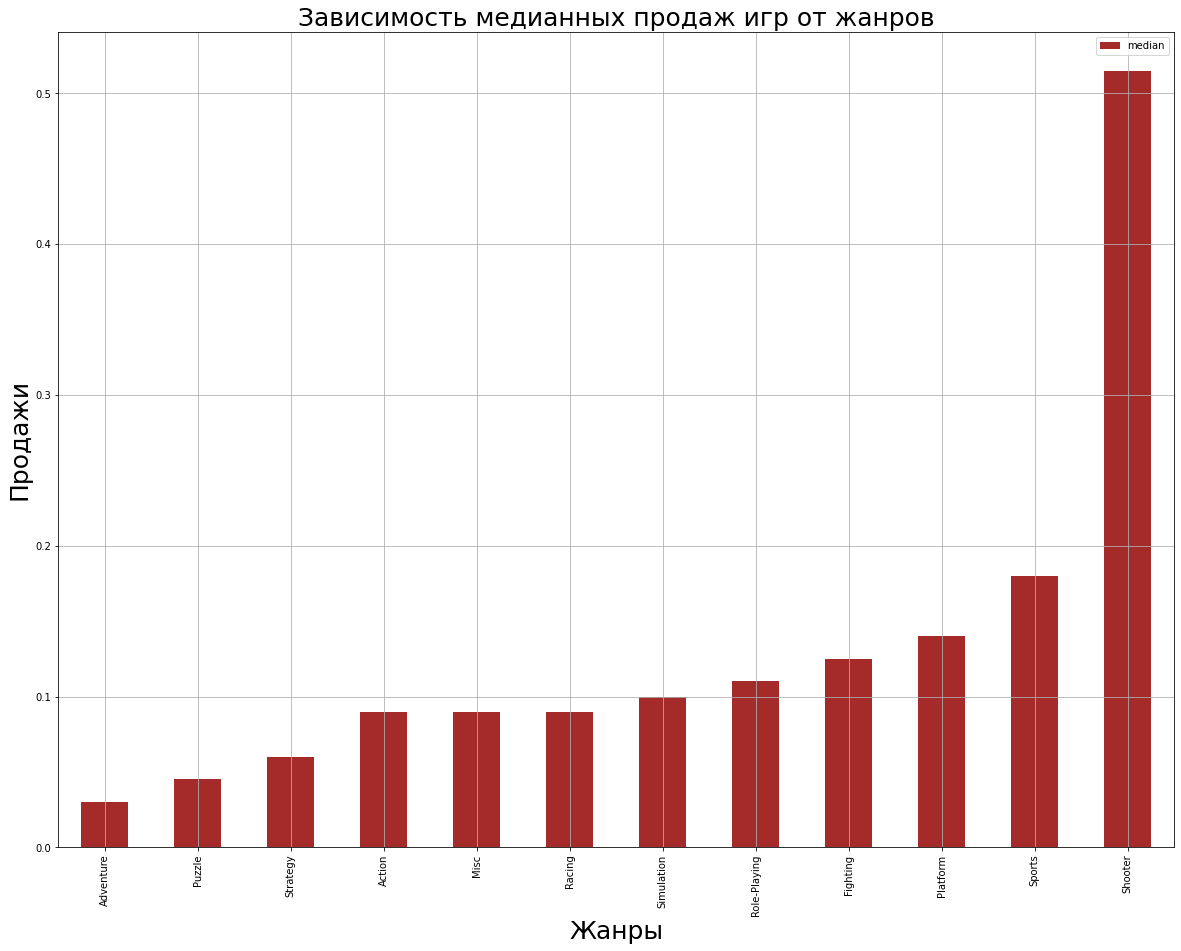

In [59]:
# Построение графика зависимости медианных продаж от жанра:
df_ts_med = current_df.pivot_table(index='genre', values='total_sales', aggfunc='median')
df_ts_med.columns = ['median']
df_ts_med = df_ts_med.sort_values('median', ascending=True)
df_ts_med.plot(y='median', kind='bar', figsize=(20, 15), grid=True, color='brown')
plt.title('Зависимость медианных продаж игр от жанров', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

Вот тут всё и встало на свои места. Самым успешным жанром по продажам действительно являются шутеры, остальные сильно от него отстают. Action же занимает 9 место, значит, количество действительно имеет значение, за счёт большого числа выпускаемых игр он и занимает лидирующие позиции по общим показателям.

##### Промежуточный вывод:
Самый широкоиздаваемый жанр в актуальном периоде - "Action". Однако шутеры, имея выпуск в 6 раз меньше, умудряются отставать от него по общей выручке всего на 15%, а вот по медианным продажам они беспорные лидеры, на несколько голов превосходящие другие жанры. Также крупными можно назвать спортивные и рпг игры, у остальных общие сборы куда ниже, как и количество игр по этим жанрам. Самым неактуальным являются пазлы, хотя медианные продажи у них всё же выше, чем у приключенческих игр.

#### Вывод:
Проведён исследовательский анализ данных. Дополнительных обработок данных не проводилось, осуществлялись преобразования с полученные ранее датафреймом. Были рассмотрены 8 ключевых пунктов. Результаты следующие:
 1) Игры начали активно выпускаться и набирать обороты с 1991 года. Игровой "бум" пришёлся на 2008 и 2009 года. В 2011 последовал резкий спад, после которого количество игр, выпускающихся каждый год, примерно одинаково.
 
 2) По статистике игры, выходящие на 6 платформах, за всё время получили больше всего продаж. Были разобраны все 6 платформ по продажам по разным годам:
  - на PS игры начали продаваться с 1994 года, пик пришёлся на 1998, после него резкий спад, к 2004 году игры уже не продавались;
  - PS2 перехватила эстафету в 2000 году, пик на 2002 и 2004 года, спад начался в 2006, к 2012 игры не продавались;
  - на DS начали что-то продавать в 2004, с 2005 по 2009 стабильные продажи, далее спад, к 2014 ничего не продавалось;
  - на X360 начались продажи в 2004, пик пришёлся на 2010, к 2016 году продажи многократно упали;
  - Wii стартовала в 2006 сразу с хороших продаж, пик на 2009 год, далее спад и практическая смерть к 2016;
  - на PS3 продажи начались в 2006, пик пришёлся на 2011. В 2014 сильное падение продаж, далее постепенный спад.
  
По общей картине можно сказать, что платформы постоянно сменяют друг друга, пики продаж игр практически никогда не совпадают, а высокий уровень продаж держится в среднем 5 лет подряд, после чего происходит спад. В 2014 году у всех "современных" платформ наблюдается резкое снижение. Причина не понятна, так как выпуск игр сократился ещё в 2012. Возможно, к 14 году были доделаны все обещанные ранее проекты, а дальше на игровом рынке началась зима. Либо дело в самих студиях разработки и новых технологиях, невозможность реализовать идеи или их отсутствие. Также есть вероятность того, что начали развиваться новые платформы, которые подвинули старых фаворитов.

 3) Был выделен актуальный период в жизни игрового рынка: 2014-2016 года. Опираясь на него, можно построить прогнозы на 2017 год. Оказалось, что спад лидирующих платформ произошёл из-за появления новых. Основной вклад внесли PS4 и XOne.
 
 4) Из показателей PS4 и XOne видно, что предыдущие выводы оказались верными: количество проектов, а, следовательно, и выручка за них растёт. Значит, для максимальной прибыли следует разрабатывать игры для этих платформ.
 
 5) Выбросы в общей выручке за проекты на любой платформе присутствуют, однако это наверняка какие-то реальные игры, которые смогли "выстрелить". Больше всего (и крупнее по доходу) их оказалось для платформы PS4, следующие значительные выбросы были у 3DS (судя по всему, благодаря ним эта платформа и оказалась в топ-3 по продажам на диаграмме из предыдущих пунктов), XOne на третьем месте по значимым выбросам. По среднему чеку оказалось, что WiiU несильно уступает XOne, хотя общие продажи значительно ниже. Занятно, что минимальная сумма на всех платформах составляет 0,01. Получается, есть некоторая стартовая цена для всего рынка в целом.
 
 6) Отзывы и продажи не имеют между собой прямой связи (оценки пользователей вообще никак не влияют на показатель продаж, оценки критиков имеют слабую связь с ними).
 
 7) По средним показателям нынешним фаворитам есть куда расти, хотя, учитывая года активности всех платформ, можно с уверенностью сказать, что рынок только растёт, значит, PS4 и XOne могут в несколько раз превзойти предшественников по прибыли. Интересно, что есть 2 платформы, на которых зарегестрировано лишь по 1 игре.
 
 8) Самый широкоиздаваемый жанр в актуальном периоде - "Action". Однако шутеры, имея выпуск в 6 раз меньше, умудряются отставать от него по общей выручке всего на 15%, а вот по медианным продажам они беспорные лидеры, на несколько голов превосходящие другие жанры. Также крупными можно назвать спортивные и рпг игры, у остальных общие сборы куда ниже, как и количество игр по этим жанрам. Самым неактуальным являются пазлы, хотя медианные продажи у них всё же выше, чем у приключенческих игр.

### Составление портретов пользователей каждого региона

Всего в таблице описаны 3 конкретных региона: Северная Америка, Европа и Япония. По ним и будем производить анализ по очереди. Напомним, что анализ производится по актуальным данным.

#### Пользователи Северной Америки

Определим самые популярные платформы. Составим топ-5 по ним.

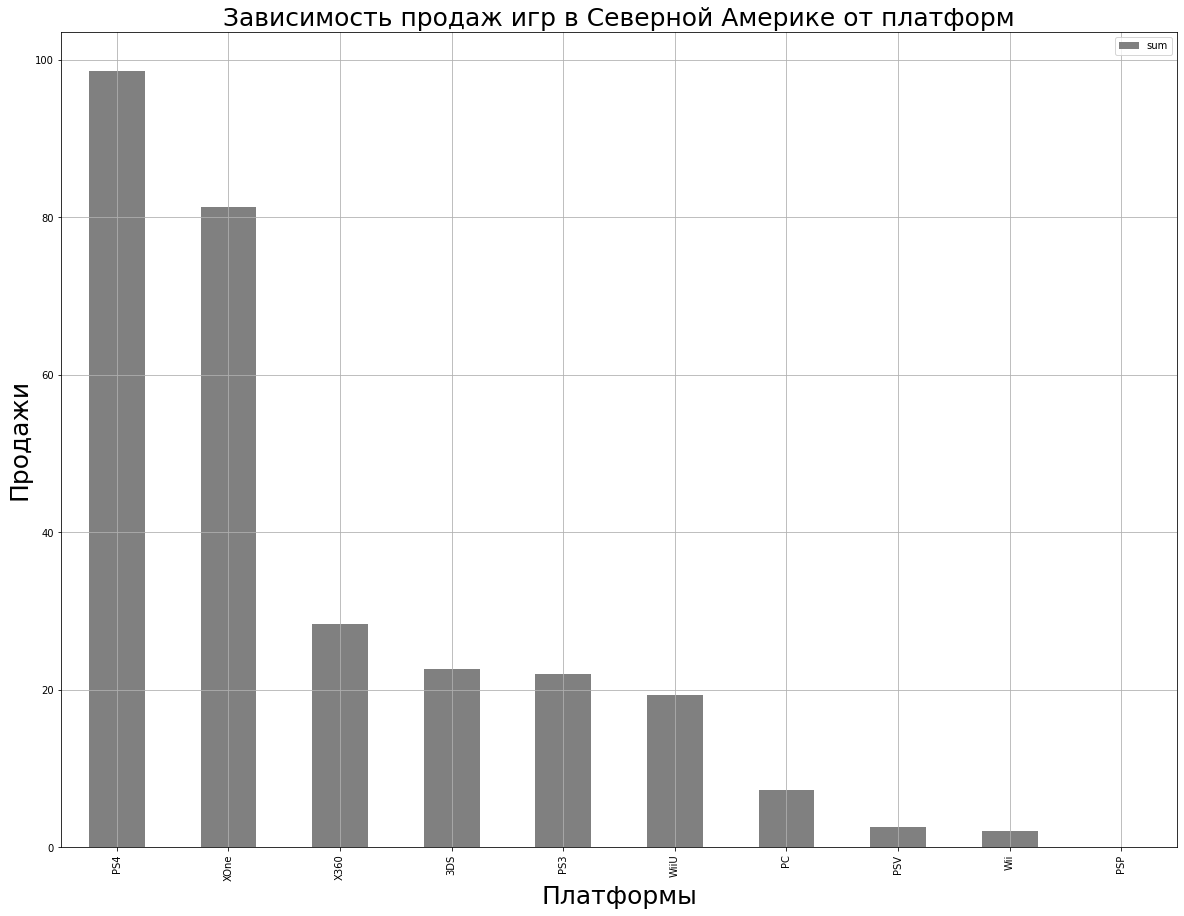

            sum
platform       
PS4       98.61
XOne      81.27
X360      28.30
3DS       22.64
PS3       22.05
WiiU      19.36
PC         7.23
PSV        2.52
Wii        2.08
PSP        0.00


In [60]:
# С помощью сводной таблицы достигнем поставленной задачи:
na_plf_df = current_df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_plf_df.columns = ['sum']
na_plf_df = na_plf_df.sort_values('sum', ascending=False)
na_plf_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='grey')
plt.title('Зависимость продаж игр в Северной Америке от платформ', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформы', fontsize=25)
plt.show()

print(na_plf_df)

Явные фавориты - консоли нового поколения: PS4 и XOne. Далее идут их предшественники и 3DS.

Определим самые популярные жанры. Составим топ-5 по ним.

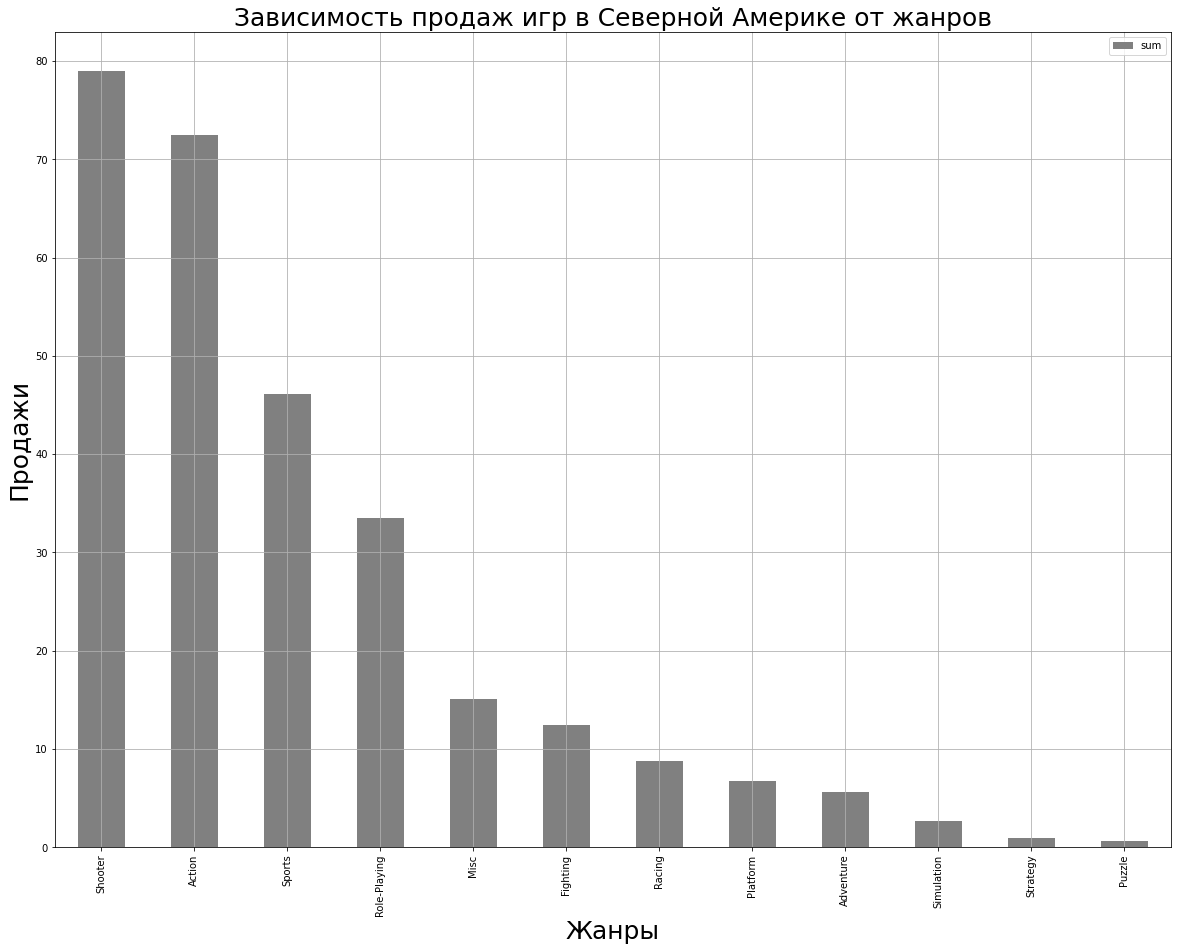

                sum
genre              
Shooter       79.02
Action        72.53
Sports        46.13
Role-Playing  33.47
Misc          15.05
Fighting      12.43
Racing         8.74
Platform       6.79
Adventure      5.64
Simulation     2.63
Strategy       0.98
Puzzle         0.65


In [61]:
# С помощью сводной таблицы достигнем поставленной задачи:
na_genre_df = current_df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_genre_df.columns = ['sum']
na_genre_df = na_genre_df.sort_values('sum', ascending=False)
na_genre_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='grey')
plt.title('Зависимость продаж игр в Северной Америке от жанров', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

print(na_genre_df)

Распределение по местам не отличается от общего топа: шутры, экшн, спортивные, ролевые и разнообразные.

Влияет ли рейтинг ESRB на продажи?

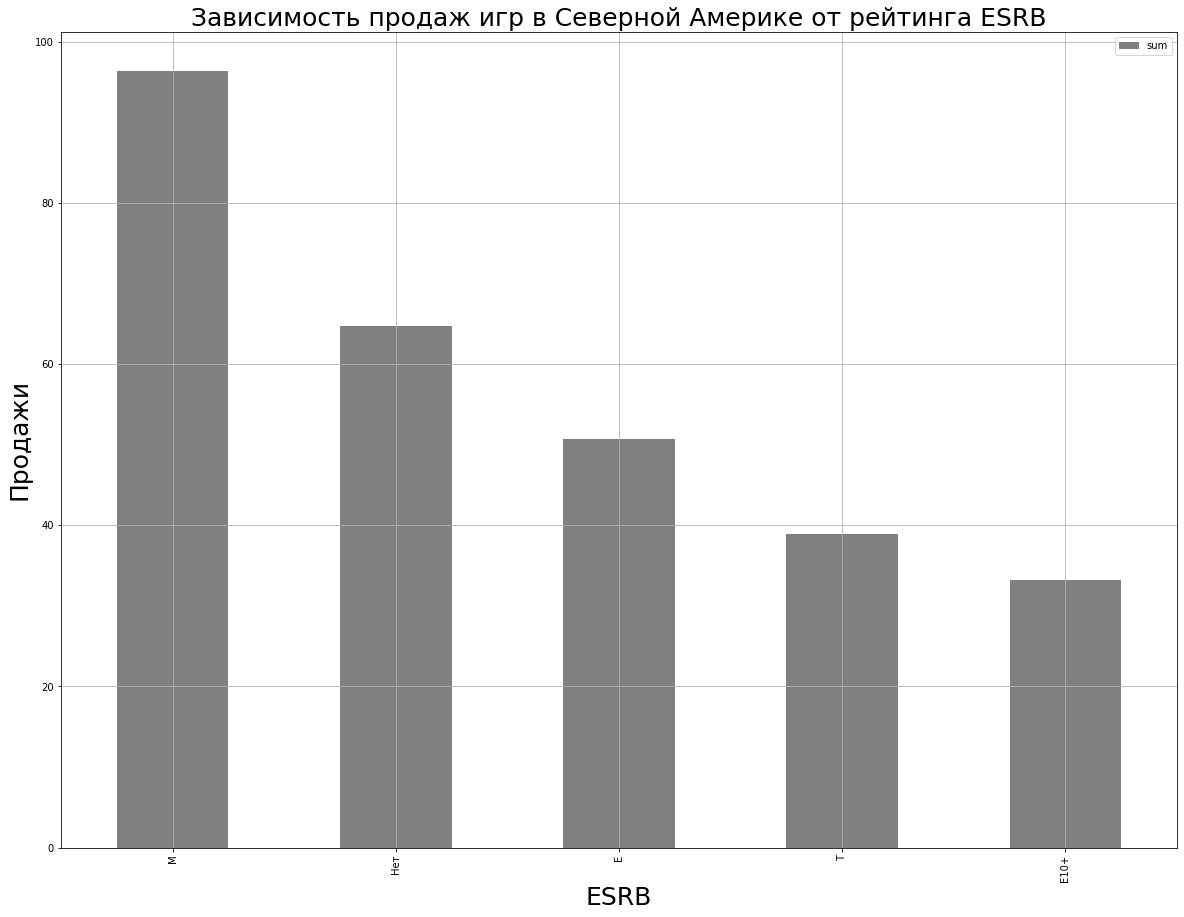

          sum
rating       
M       96.42
Нет     64.72
E       50.74
T       38.95
E10+    33.23


In [62]:
# С помощью сводной таблицы достигнем поставленной задачи:
na_esrb_df = current_df.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_esrb_df.columns = ['sum']
na_esrb_df = na_esrb_df.sort_values('sum', ascending=False)
na_esrb_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='grey')
plt.title('Зависимость продаж игр в Северной Америке от рейтинга ESRB', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('ESRB', fontsize=25)
plt.show()

print(na_esrb_df)

Большая часть рынка принадлежит играм для взрослых (17+ лет).

##### Промежуточный вывод:
В результате исследования пользователей Северной Америки пришли к следующим выводам:
  1) Из платформ игроки предпочитают консоли нового поколения - PS4 и XOne, остальные 3 места в топе принадлежат их предшественникам и 3DC;
  2) Больше всего пользователи предпочитают игры жанров Shooter и Action, также хорошо относятся к Sports, Role-Playing и Misc;\
  3) Подавляющее большинство проданных игр точно имеют оценку "M" - для взрослых (17+), игры для всех ("E") наверняка были бы на втором месте при полноте данных.

#### Пользователи Европы

Определим самые популярные платформы. Составим топ-5 по ним.

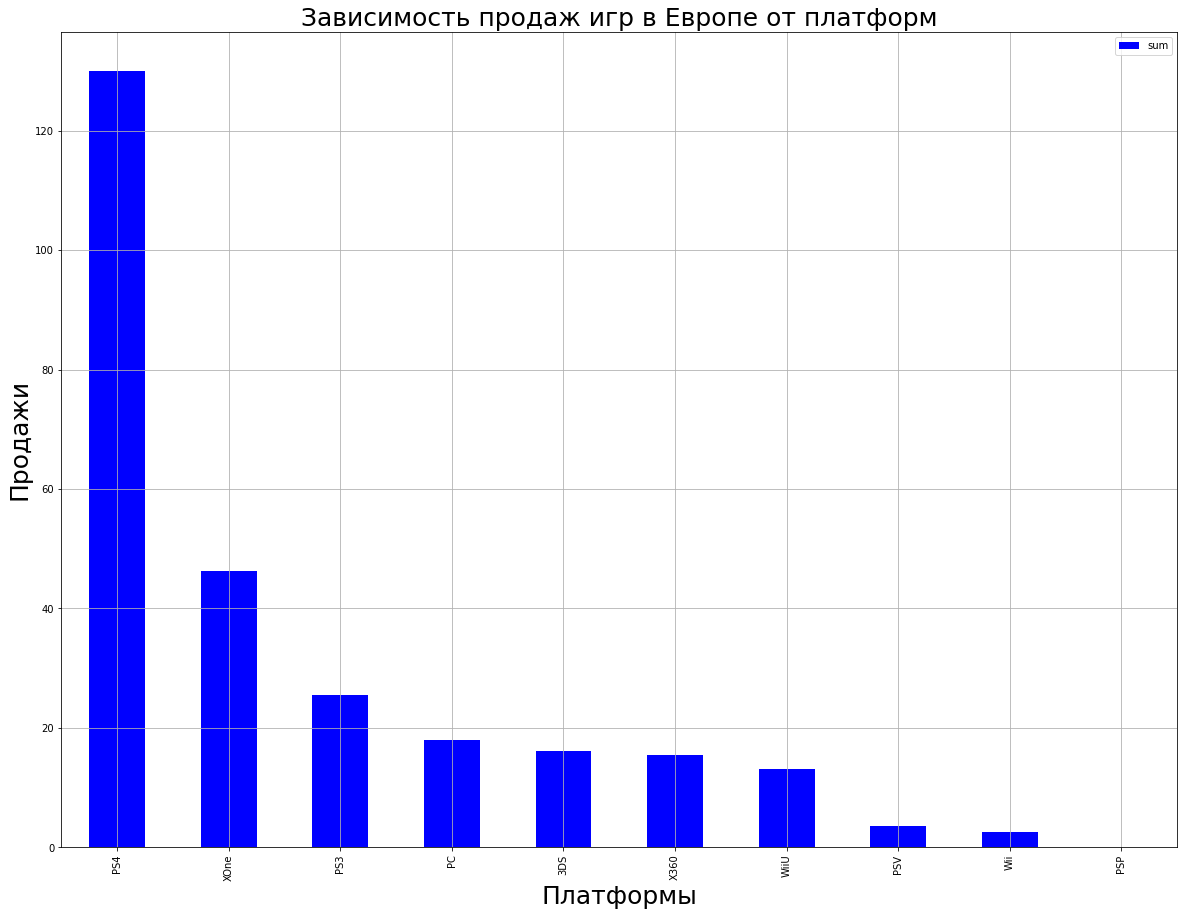

             sum
platform        
PS4       130.04
XOne       46.25
PS3        25.54
PC         17.97
3DS        16.12
X360       15.49
WiiU       13.15
PSV         3.53
Wii         2.59
PSP         0.00


In [63]:
# С помощью сводной таблицы достигнем поставленной задачи:
eu_plf_df = current_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_plf_df.columns = ['sum']
eu_plf_df = eu_plf_df.sort_values('sum', ascending=False)
eu_plf_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='blue')
plt.title('Зависимость продаж игр в Европе от платформ', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформы', fontsize=25)
plt.show()

print(eu_plf_df)

Явное лидерство принадлежит PS4, XOne имеет значительно меньше поклонников. На третьем месте также предыдущая версия PS, за ней идёт PC и 3DS. X360 занимает лишь 6 место.

Определим самые популярные жанры. Составим топ-5 по ним.

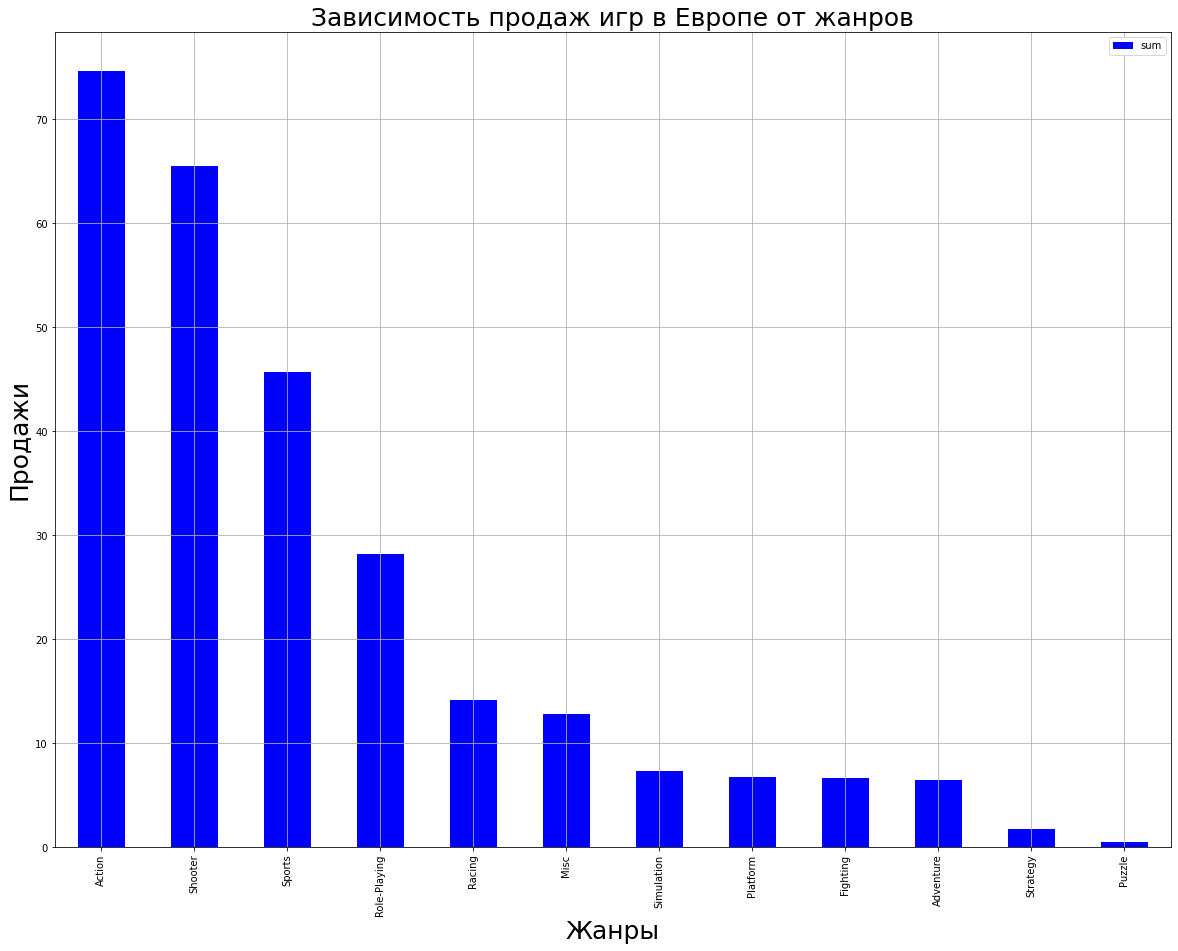

                sum
genre              
Action        74.68
Shooter       65.52
Sports        45.73
Role-Playing  28.17
Racing        14.13
Misc          12.86
Simulation     7.30
Platform       6.80
Fighting       6.69
Adventure      6.49
Strategy       1.79
Puzzle         0.52


In [64]:
# С помощью сводной таблицы достигнем поставленной задачи:
eu_genre_df = current_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_genre_df.columns = ['sum']
eu_genre_df = eu_genre_df.sort_values('sum', ascending=False)
eu_genre_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='blue')
plt.title('Зависимость продаж игр в Европе от жанров', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

print(eu_genre_df)

Экшн обогнал в этом регионе шутеры, также у спортивных игр позиция крепче. На четвёртом месте так же ролевые, а вот пятое принадлежит гонкам.

Влияет ли рейтинг ESRB на продажи?

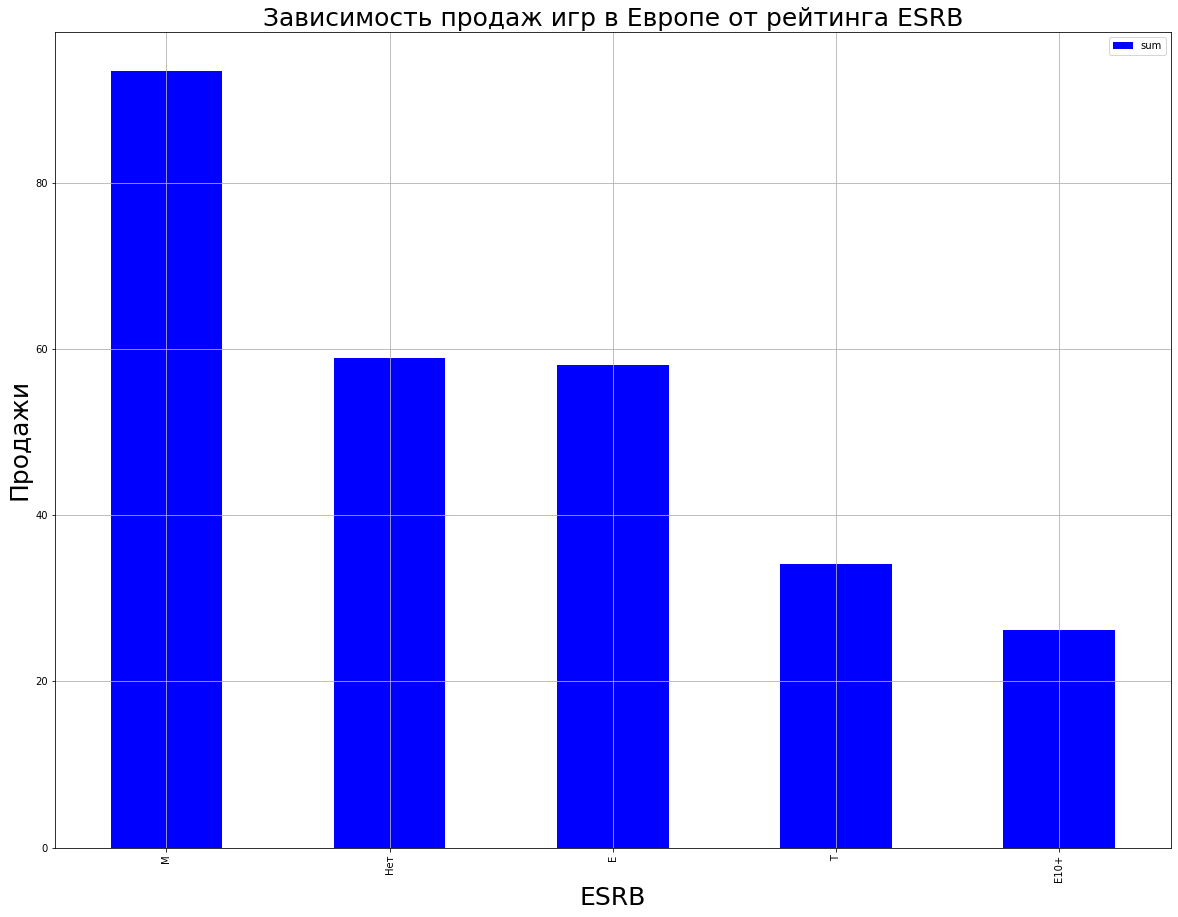

          sum
rating       
M       93.44
Нет     58.95
E       58.06
T       34.07
E10+    26.16


In [65]:
# С помощью сводной таблицы достигнем поставленной задачи:
eu_esrb_df = current_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_esrb_df.columns = ['sum']
eu_esrb_df = eu_esrb_df.sort_values('sum', ascending=False)
eu_esrb_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='blue')
plt.title('Зависимость продаж игр в Европе от рейтинга ESRB', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('ESRB', fontsize=25)
plt.show()

print(eu_esrb_df)

Распределение похоже на Северную Америку. Неопределённых рейтингов немного меньше, а вот игр для всех наоборот чуть больше, что подтверждает теорию.

##### Промежуточный вывод:
В результате исследования пользователей Европы пришли к следующим выводам:
  1) Из платформ игроки отдают предпочтения PS4; XOne на втором месте со значительным отрывом от первого, остальные 3 места в топе принадлежат PS3, PC и 3DS;\
  2) Больше всего пользователи предпочитают игры жанров Action и Shooter, уверенное третье место у Sports, далее идут Role-Playing и Racing;\
  3) По рейтингу ситуация аналогичная.

#### Пользователи Японии

Определим самые популярные плафтормы. Составим топ-5 по ним.

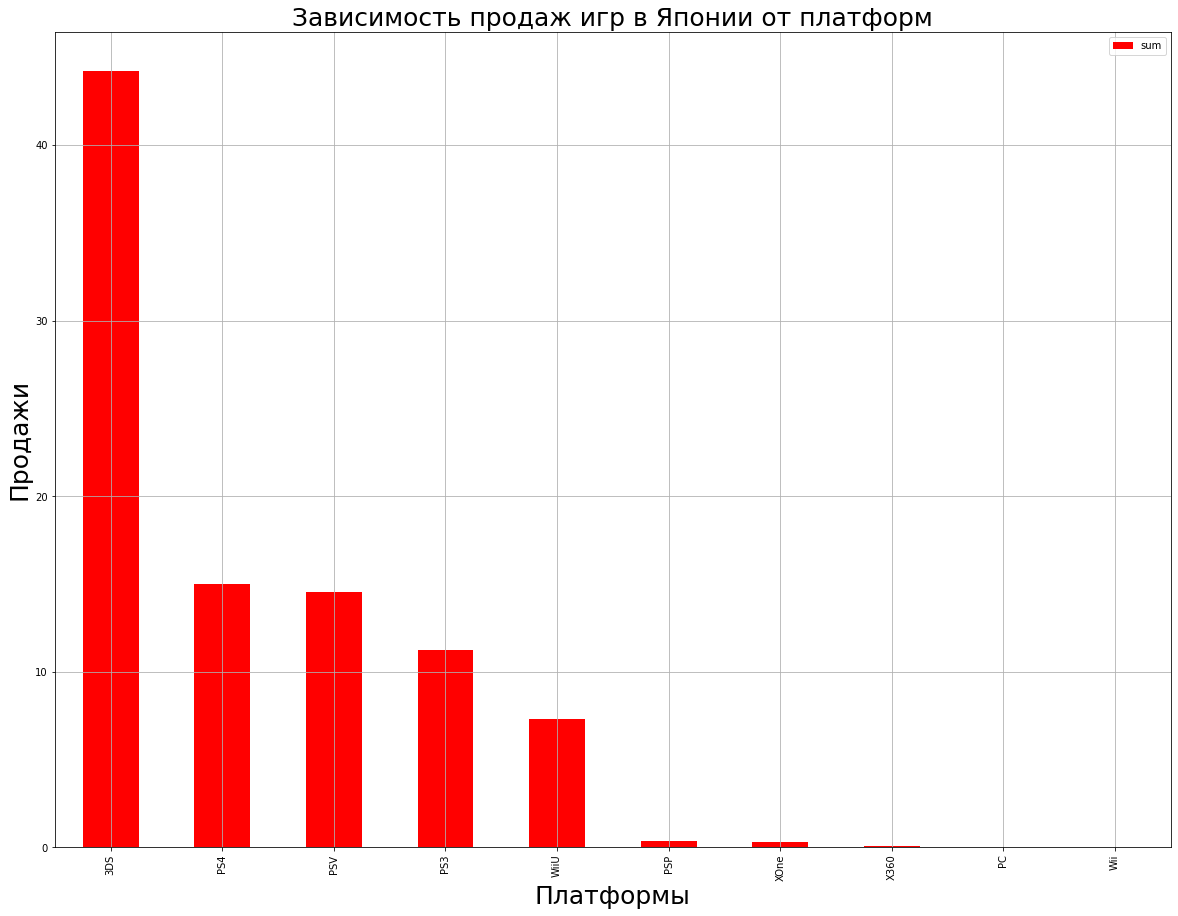

            sum
platform       
3DS       44.24
PS4       15.02
PSV       14.54
PS3       11.22
WiiU       7.31
PSP        0.36
XOne       0.32
X360       0.08
PC         0.00
Wii        0.00


In [66]:
# С помощью сводной таблицы достигнем поставленной задачи:
jp_plf_df = current_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_plf_df.columns = ['sum']
jp_plf_df = jp_plf_df.sort_values('sum', ascending=False)
jp_plf_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='red')
plt.title('Зависимость продаж игр в Японии от платформ', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Платформы', fontsize=25)
plt.show()

print(jp_plf_df)

Неожиданная картина, как будто с другой планеты, а не региона. Абсолютный фаворит - 3DS, различные версии PS занимают 2, 3 и 4 места, на пятом WiiU. Xbox практически не используется.

Определим самые популярные жанры. Составим топ-5 по ним.

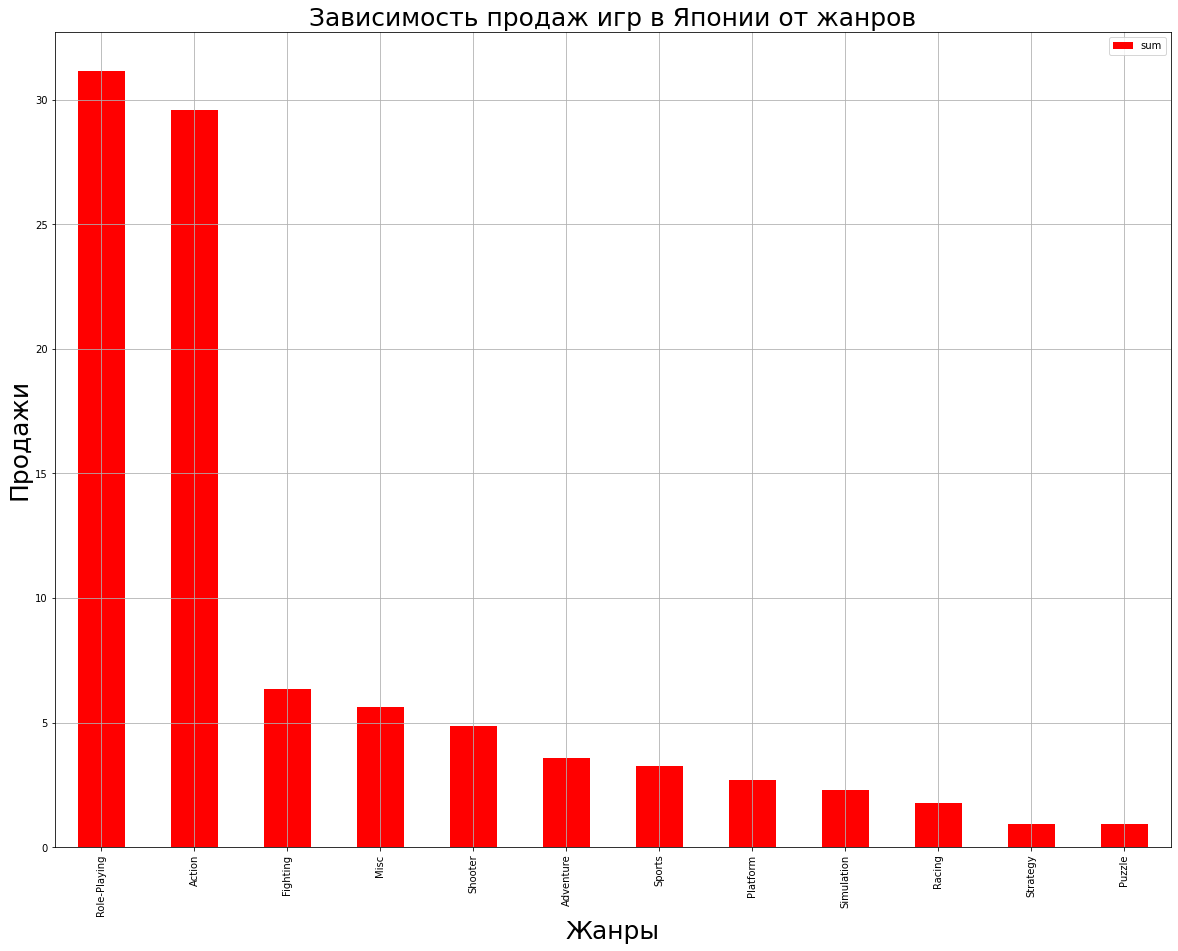

                sum
genre              
Role-Playing  31.16
Action        29.58
Fighting       6.37
Misc           5.61
Shooter        4.87
Adventure      3.60
Sports         3.26
Platform       2.69
Simulation     2.31
Racing         1.76
Strategy       0.95
Puzzle         0.93


In [67]:
# С помощью сводной таблицы достигнем поставленной задачи:
jp_genre_df = current_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_genre_df.columns = ['sum']
jp_genre_df = jp_genre_df.sort_values('sum', ascending=False)
jp_genre_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='red')
plt.title('Зависимость продаж игр в Японии от жанров', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('Жанры', fontsize=25)
plt.show()

print(jp_genre_df)

Шутеры замыкают 5-ку лидеров, немного оторвались от него вперёд Fighting и Misc. Топ-1 занимают ролевые игры, немного им уступает Action.

Влияет ли рейтинг ESRB на продажи?

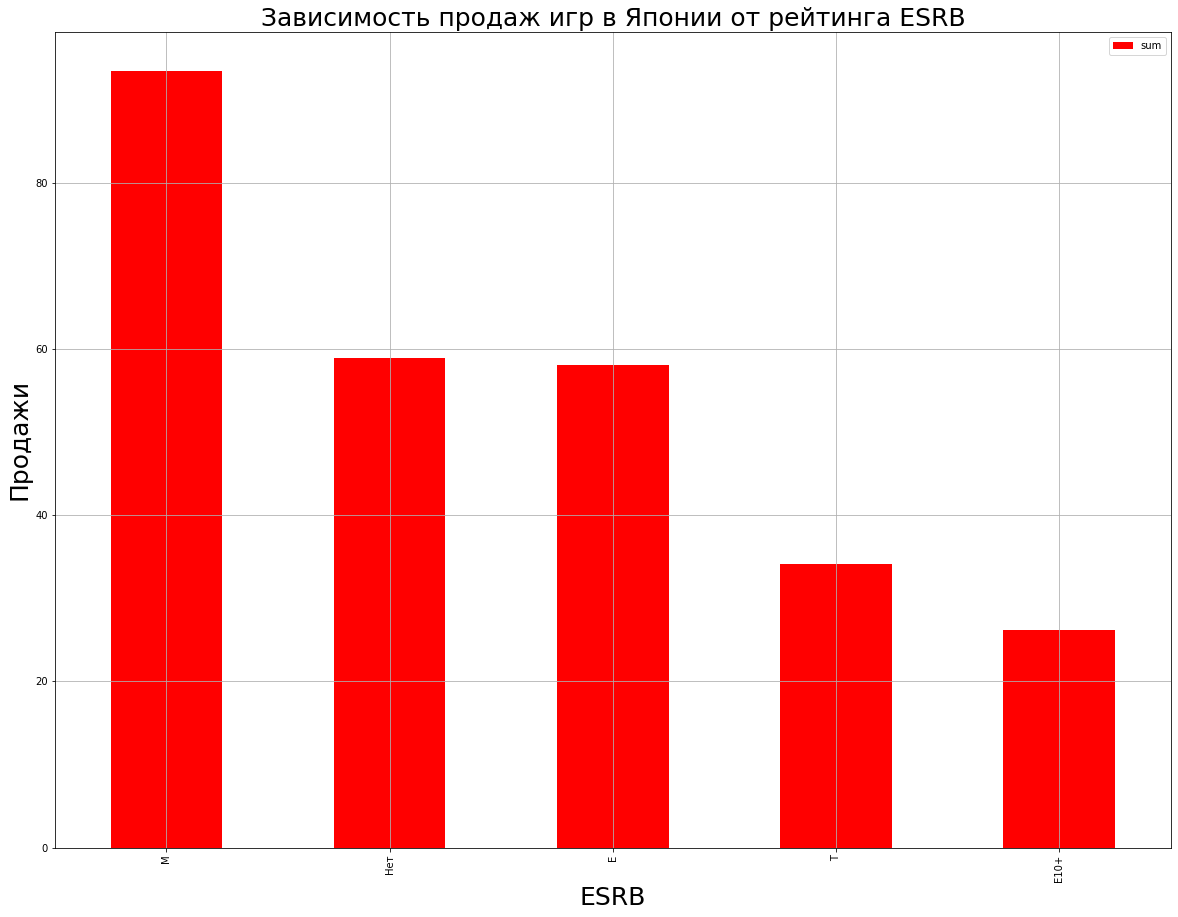

          sum
rating       
M       93.44
Нет     58.95
E       58.06
T       34.07
E10+    26.16


In [68]:
# С помощью сводной таблицы достигнем поставленной задачи:
jp_esrb_df = current_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_esrb_df.columns = ['sum']
jp_esrb_df = eu_esrb_df.sort_values('sum', ascending=False)
jp_esrb_df.plot(y='sum', kind='bar', figsize=(20, 15), grid=True, color='red')
plt.title('Зависимость продаж игр в Японии от рейтинга ESRB', fontsize=25)
plt.ylabel('Продажи', fontsize=25)
plt.xlabel('ESRB', fontsize=25)
plt.show()

print(jp_esrb_df)

Картина аналогична двум предыдущим регионам.

##### Промежуточный вывод:
В результате исследования пользователей Японии пришли к следующим выводам:
  1) Из платформ явный фаворит 3DS, дальше 3 места с небольшими отрывами друг от друга занимают различные версии PS, замыкает топ WiiU;
  2) Больше всего пользователи предпочитают игры жанров RPG и Action, со значительным отрывом после них идут Fighting, Shooter и Misc;\
  3) По рейтингу ситуация аналогична.

#### Вывод:
После проведённого исследования можно составить портреты пользователей различных регионов:
  - Северная Америка - игроки предпочитают консоли нового поколения PS4 и XOne, из игр выбор в основном лежит между Shooter и Action;
  - Европа - отдают явное предпочтение PS4, по жанрам выбор такой же, как и в случае с Северной Америкой, однако с большей вероятностью добавляется третий - Sports;
  - Япония - основной платформой является 3DS, из жанров Role-Playing и Action.
  
По общему анализу можно сказать, что рейтинг ESRB не влияет на предпочтения пользователей. Везде преобладают игры с рейтингом "M", причина этого наверняка очень проста: таких игр на рынке большинство. Анализ мог бы быть гораздо точнее, будь у нас в распоряжении все данные (топ-2 везде занимают игры с неопределённым рейтингом).

Можно сказать, что игроки Северной Америки и Европы практически идентичны друг другу за исключением нескольких мелочей, но вот статистика по Японии кардинально отличается от других. По сути это отдельный рынок с абсолютно другими требованиями.

### Проверка гипотез

Для проверки гипотез будем использовать t-тесты. Напомним, что в качестве нулевой гипотезы берётся равенство сравниваемых величин, в качестве альтернативной - наоборот. Уровень статистической значимости примем 5%.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвигаем 2 гипотезы: 
 1) H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
 2) H1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [69]:
# Для начала создадим две отдельные таблицы с рейтингами по XOne и PC:
pc_score = current_df.query('platform == "PC" and user_score > 0')
xb_score = current_df.query('platform == "XOne" and user_score > 0')

# Проверим, какие средние оценки имеют игры на этих платформах:
print(pc_score['user_score'].mean())
print(xb_score['user_score'].mean())

6.298360655737705
6.594545454545456


In [70]:
#Сравниваем 2 разные таблицы, поэтому используем "_ind" с неравным количеством столбцов:
results = st.ttest_ind(pc_score['user_score'], xb_score['user_score'], equal_var=False, alternative='two-sided')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


##### Промежуточный вывод:
Средние рейтинги от пользователей у игр на XOne и PC действительно схожи.

#### Средние пользовательские рейтинги жанров Action и Sports разные

Выдвигаем 2 гипотезы:

1) H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые;\
2) H1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [71]:
# Для начала создадим две отдельные таблицы с рейтингами по XOne и PC:
action_score = current_df.query('genre == "Action" and user_score > 0')
sports_score = current_df.query('genre == "Sports" and user_score > 0')

# Проверим, какие средние оценки имеют игры на этих платформах:
print(action_score['user_score'].mean())
print(sports_score['user_score'].mean())

6.760606060606061
5.2251968503937


In [72]:
#Сравниваем 2 разные таблицы, поэтому используем "_ind" с неравным количеством столбцов:
results = st.ttest_ind(action_score['user_score'], sports_score['user_score'], equal_var=False, alternative='two-sided')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


##### Промежуточный вывод:
Средние оценки по этим двум жанрам у пользователей сильно отличаются.

#### Вывод:
В ходе выполнения работы было проверено 2 гипотезы:

  1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - разброс оказался незначительным, рейтинги действительно схожи;\
  2) Средние пользовательские рейтинги жанров Action и Sports разные - средние показатели не схожи друг с другом.

### Общий вывод:

На анализ данных была представлена таблица по сводкам игр, выходящих в промежуток с 1993 по 2016 год. Датафрейм содержал общую информацию по каждой игре, включающую название, жанр, год выхода, рейтинги, продажи по нескольким регионам. 

#### Предобработка данных:
В ходе предобработки данных была проделана следующая работа:
  - проведена проверка на явные дубликаты; 
  - названия столбцов приведены к нижнему регистру; 
  - удалены строки с невосстанавливаемыми данными (пропуски в столбцах 'name' и 'genre'); 
  - заменены пропущеные значения (в столбцах с рейтингами от критиков и пользователей вставлено выдающееся значение, которое описывает собой пропуск: в 'user_score' много пропусков из-за того, что многие проекты всё ещё ожидают итоговую оценку, в 'critic_score' пропуски могут быть из-за невнимательности составителей таблицы, либо из-за труднодоступности информации; пропуски в 'rating' присутствуют по тем же причинам);
  - добавлен столбец с суммарными продажами по миру.
  
Можно сделать общее замечание: чем старше проект, тем меньше по нему уточняющей информации.

#### Исследовательский анализ данных:
Проведён исследовательский анализ данных. Дополнительных обработок данных не проводилось, осуществлялись преобразования с полученные ранее датафреймом. Были рассмотрены 8 ключевых пунктов. Результаты следующие:
 1) Игры начали активно выпускаться и набирать обороты с 1991 года. Игровой "бум" пришёлся на 2008 и 2009 года. В 2011 последовал резкий спад, после которого количество игр, выпускающихся каждый год, примерно одинаково.
 
 2) По статистике игры, выходящие на 6 платформах, за всё время получили больше всего продаж. Были разобраны все 6 платформ по продажам по разным годам:
  - на PS игры начали продаваться с 1994 года, пик пришёлся на 1998, после него резкий спад, к 2004 году игры уже не продавались;
  - PS2 перехватила эстафету в 2000 году, пик на 2002 и 2004 года, спад начался в 2006, к 2012 игры не продавались;
  - на DS начали что-то продавать в 2004, с 2005 по 2009 стабильные продажи, далее спад, к 2014 ничего не продавалось;
  - на X360 начались продажи в 2004, пик пришёлся на 2010, к 2016 году продажи многократно упали;
  - Wii стартовала в 2006 сразу с хороших продаж, пик на 2009 год, далее спад и практическая смерть к 2016;
  - на PS3 продажи начались в 2006, пик пришёлся на 2011. В 2014 сильное падение продаж, далее постепенный спад.
  
По общей картине можно сказать, что платформы постоянно сменяют друг друга, пики продаж игр практически никогда не совпадают, а высокий уровень продаж держится в среднем 5 лет подряд, после чего происходит спад. В 2014 году у всех "современных" платформ наблюдается резкое снижение. Причина не понятна, так как выпуск игр сократился ещё в 2012. Возможно, к 14 году были доделаны все обещанные ранее проекты, а дальше на игровом рынке началась зима. Либо дело в самих студиях разработки и новых технологиях, невозможность реализовать идеи или их отсутствие. Также есть вероятность того, что начали развиваться новые платформы, которые подвинули старых фаворитов.

 3) Был выделен актуальный период в жизни игрового рынка: 2014-2016 года. Опираясь на него, можно построить прогнозы на 2017 год. Оказалось, что спад лидирующих платформ произошёл из-за появления новых. Основной вклад внесли PS4 и XOne.
 
 4) Из показателей PS4 и XOne видно, что предыдущие выводы оказались верными: количество проектов, а, следовательно, и выручка за них растёт. Значит, для максимальной прибыли следует разрабатывать игры для этих платформ.
 
 5) Выбросы в общей выручке за проекты на любой платформе присутствуют, однако это наверняка какие-то реальные игры, которые смогли "выстрелить". Больше всего (и крупнее по доходу) их оказалось для платформы PS4, следующие значительные выбросы были у 3DS (судя по всему, благодаря ним эта платформа и оказалась в топ-3 по продажам на диаграмме из предыдущих пунктов), XOne на третьем месте по значимым выбросам. По среднему чеку оказалось, что WiiU несильно уступает XOne, хотя общие продажи значительно ниже. Занятно, что минимальная сумма на всех платформах составляет 0,01. Получается, есть некоторая стартовая цена для всего рынка в целом.
 
 6) Отзывы и продажи не имеют между собой прямой связи (оценки пользователей вообще никак не влияют на показатель продаж, оценки критиков имеют слабую связь с ними).
 
 7) По средним показателям нынешним фаворитам есть куда расти, хотя, учитывая года активности всех платформ, можно с уверенностью сказать, что рынок только растёт, значит, PS4 и XOne могут в несколько раз превзойти предшественников по прибыли. Интересно, что есть 2 платформы, на которых зарегестрировано лишь по 1 игре.
 
 8) Самый широкоиздаваемый жанр в актуальном периоде - "Action". Однако шутеры, имея выпуск в 6 раз меньше, умудряются отставать от него по общей выручке всего на 15%, а вот по медианным продажам они беспорные лидеры, на несколько голов превосходящие другие жанры. Также крупными можно назвать спортивные и рпг игры, у остальных общие сборы куда ниже, как и количество игр по этим жанрам. Самым неактуальным являются пазлы, хотя медианные продажи у них всё же выше, чем у приключенческих игр.

#### Составление портретов игроков разных регионов:
После проведённого исследования можно составить портреты пользователей различных регионов:
  - Северная Америка - игроки предпочитают консоли нового поколения PS4 и XOne, из игр выбор в основном лежит между Shooter и Action;
  - Европа - отдают явное предпочтение PS4, по жанрам выбор такой же, как и в случае с Северной Америкой, однако с большей вероятностью добавляется третий - Sports;
  - Япония - основной платформой является 3DS, из жанров Role-Playing и Action.
  
По общему анализу можно сказать, что рейтинг ESRB не влияет на предпочтения пользователей. Везде преобладают игры с рейтингом "M", причина этого наверняка очень проста: таких игр на рынке большинство. Анализ мог бы быть гораздо точнее, будь у нас в распоряжении все данные (топ-2 везде занимают игры с неопределённым рейтингом).

Можно сказать, что игроки Северной Америки и Европы практически идентичны друг другу за исключением нескольких мелочей, но вот статистика по Японии кардинально отличается от других. По сути это отдельный рынок с абсолютно другими требованиями.

#### Проверка гипотез:
В ходе выполнения работы было проверено 2 гипотезы:

  1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - разброс оказался незначительным, рейтинги действительно схожи;\
  2) Средние пользовательские рейтинги жанров Action и Sports разные - средние показатели не схожи друг с другом.

#### Итог:
В ходе анализа данных все поставленные задачи были выполнены: построены информативные графики зависимости величин друг от друга и необходимые гистограммы, получены конкретные результаты по каждому пункту. Имеет смысл провести дополнительные исследования через год, когда по некоторым проектам появится оценка от критиков и пользователей, чтобы убедиться в правильности полученных результатов.